In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gzip;
import scipy.stats
from scipy import signal
import numpy as np
from scipy.optimize import curve_fit
import plotly.graph_objs as go
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import norm
from scipy.stats import skew
import warnings
import seaborn
import os
import os.path
import glob as glob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [296]:
User0_gps=pd.read_csv('/Users/user/Desktop/ExtraSensory Gps/0A986513-7828-4D53-AA1F-E02D6DF9561B.absolute_locations.csv')

In [132]:
User0_gps.fillna('')

,timestamp,latitude,longitude
0,1449601597,32.882134,-117.234553
1,1449601657,32.882134,-117.234553
2,1449601717,32.882444,-117.234586
3,1449601777,32.882458,-117.234607
4,1449601855,32.882461,-117.234592
...,...,...,...
3955,1449859467,32.884757,-117.243513
3956,1449859527,32.884767,-117.243478
3957,1449859587,32.884767,-117.243479
3958,1449859647,32.884767,-117.24348


In [133]:
df=pd.read_csv('/Users/user/Desktop/ExtraSensory.per_uuid_features_labels/0A986513-7828-4D53-AA1F-E02D6DF9561B.features_labels.csv',)

In [134]:
df=pd.DataFrame(df)

In [135]:
df

,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,...,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS,label_source,features,Unnamed: 279,Unnamed: 280,loc_features
0,1449601597,1.000371,0.007671,-0.016173,0.027860,0.998221,1.000739,1.003265,0.891038,6.684582,...,NaN,NaN,NaN,NaN,NaN,-1,raw_acc:magnitude_stats:mean,NaN,NaN,location:diameter
1,1449601657,1.000243,0.003782,-0.002713,0.007046,0.998463,1.000373,1.002088,1.647929,6.684605,...,NaN,NaN,NaN,NaN,NaN,-1,raw_acc:magnitude_stats:mean,NaN,NaN,location:diameter
2,1449601717,1.000811,0.002082,-0.001922,0.003575,0.999653,1.000928,1.002032,1.960286,6.684610,...,NaN,NaN,NaN,NaN,NaN,-1,raw_acc:magnitude_stats:mean,NaN,NaN,location:diameter
3,1449601777,1.001245,0.004715,-0.002895,0.008881,0.999188,1.001425,1.003500,1.614524,6.684601,...,NaN,NaN,NaN,NaN,NaN,-1,raw_acc:magnitude_stats:mean,NaN,NaN,location:diameter
4,1449601855,1.001354,0.065186,-0.096520,0.165298,1.000807,1.002259,1.003631,0.837790,6.682252,...,NaN,NaN,NaN,NaN,0.0,2,raw_acc:magnitude_stats:mean,NaN,NaN,location:diameter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,1449859467,1.002591,0.001446,0.000142,0.001900,1.001562,1.002603,1.003569,2.401218,6.684611,...,NaN,NaN,NaN,NaN,1.0,2,raw_acc:magnitude_stats:value_entropy,NaN,NaN,location_quick_features:lat_change
3956,1449859527,1.002673,0.001349,-0.000593,0.001731,1.001677,1.002749,1.003635,2.593006,6.684611,...,NaN,NaN,NaN,NaN,1.0,2,raw_acc:magnitude_stats:value_entropy,NaN,NaN,location_quick_features:lat_change
3957,1449859587,1.002523,0.028048,0.027043,0.076903,1.001037,1.002792,1.004425,0.509456,6.684221,...,NaN,NaN,NaN,NaN,1.0,2,raw_acc:magnitude_stats:value_entropy,NaN,NaN,location_quick_features:lat_change
3958,1449859647,1.002590,0.005246,-0.001691,0.008700,1.000274,1.002775,1.005013,1.941774,6.684598,...,NaN,NaN,NaN,NaN,1.0,2,raw_acc:magnitude_stats:value_entropy,NaN,NaN,location_quick_features:lat_change


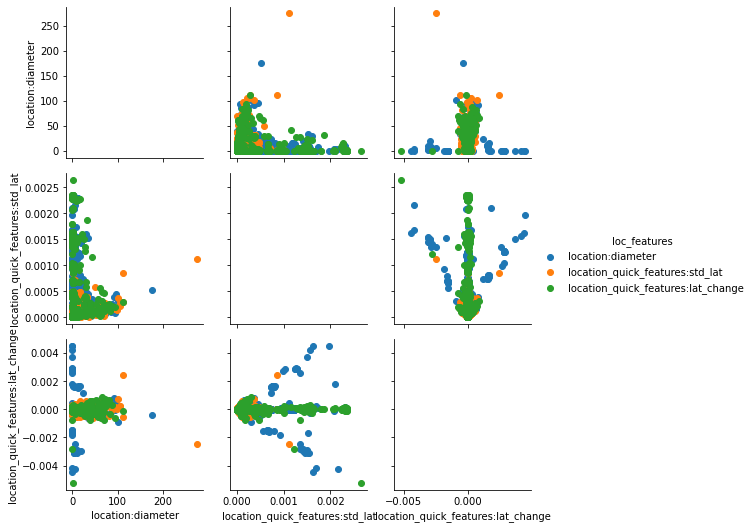

In [136]:
variables=["location:diameter", "location_quick_features:std_lat","location_quick_features:lat_change"]
graph = seaborn.PairGrid(df, hue="loc_features", vars=variables)
# type of graph for diagonal
#graph = graph.map_diag(plt.hist, )
# type of graph for non-diagonal
graph = graph.map_offdiag(plt.scatter )
# to add legends
graph = graph.add_legend()
# to show
plt.show()

In [137]:
User1_gps=pd.read_csv('/Users/user/Desktop/ExtraSensory Gps/0BFC35E2-4817-4865-BFA7-764742302A2D.absolute_locations.csv')

In [138]:
User2_gps=pd.read_csv('/Users/user/Desktop/ExtraSensory Gps/0E6184E1-90C0-48EE-B25A-F1ECB7B9714E.absolute_locations.csv')

In [139]:
User3_gps=pd.read_csv('/Users/user/Desktop/ExtraSensory Gps/00EABED2-271D-49D8-B599-1D4A09240601.absolute_locations.csv')

In [140]:
User4_gps=pd.read_csv('/Users/user/Desktop/ExtraSensory Gps/1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842.absolute_locations.csv')

In [141]:
User5_gps=pd.read_csv('/Users/user/Desktop/ExtraSensory Gps/2C32C23E-E30C-498A-8DD2-0EFB9150A02E.absolute_locations.csv')

In [142]:
User6_gps=pd.read_csv('/Users/user/Desktop/ExtraSensory Gps/4E98F91F-4654-42EF-B908-A3389443F2E7.absolute_locations.csv')

In [143]:
User7_gps=pd.read_csv('/Users/user/Desktop/ExtraSensory Gps/4FC32141-E888-4BFF-8804-12559A491D8C.absolute_locations.csv')

In [144]:
User8_gps=pd.read_csv('/Users/user/Desktop/ExtraSensory Gps/5EF64122-B513-46AE-BCF1-E62AAC285D2C.absolute_locations.csv')

In [145]:
User9_gps=pd.read_csv('/Users/user/Desktop/ExtraSensory Gps/7CE37510-56D0-4120-A1CF-0E23351428D2.absolute_locations.csv')

In [146]:
User9_gps=pd.read_csv('/Users/user/Desktop/ExtraSensory Gps/7CE37510-56D0-4120-A1CF-0E23351428D2.absolute_locations.csv')

In [147]:
User10_gps=pd.read_csv('/Users/user/Desktop/ExtraSensory Gps/7D9BB102-A612-4E2A-8E22-3159752F55D8.absolute_locations.csv')

In [148]:
User11_gps=pd.read_csv('/Users/user/Desktop/ExtraSensory Gps/9DC38D04-E82E-4F29-AB52-B476535226F2.absolute_locations.csv')

In [149]:
User12_gps=pd.read_csv('/Users/user/Desktop/ExtraSensory Gps/11B5EC4D-4133-4289-B475-4E737182A406.absolute_locations.csv')

In [150]:
User13_gps=pd.read_csv('/Users/user/Desktop/ExtraSensory Gps/24E40C4C-A349-4F9F-93AB-01D00FB994AF.absolute_locations.csv')

In [151]:
User14_gps=pd.read_csv('/Users/user/Desktop/ExtraSensory Gps/27E04243-B138-4F40-A164-F40B60165CF3.absolute_locations.csv')

In [152]:
User15_gps=pd.read_csv('/Users/user/Desktop/ExtraSensory Gps/33A85C34-CFE4-4732-9E73-0A7AC861B27A.absolute_locations.csv')

In [153]:
User0_gps.drop(['timestamp'], axis='columns', inplace=True)
User1_gps.drop(['timestamp'], axis='columns', inplace=True)
User2_gps.drop(['timestamp'], axis='columns', inplace=True)
User3_gps.drop(['timestamp'], axis='columns', inplace=True)
User4_gps.drop(['timestamp'], axis='columns', inplace=True)
User5_gps.drop(['timestamp'], axis='columns', inplace=True)
User6_gps.drop(['timestamp'], axis='columns', inplace=True)
User7_gps.drop(['timestamp'], axis='columns', inplace=True)
User8_gps.drop(['timestamp'], axis='columns', inplace=True)
User9_gps.drop(['timestamp'], axis='columns', inplace=True)
User10_gps.drop(['timestamp'], axis='columns', inplace=True)
User11_gps.drop(['timestamp'], axis='columns', inplace=True)
User12_gps.drop(['timestamp'], axis='columns', inplace=True)
User13_gps.drop(['timestamp'], axis='columns', inplace=True)
User14_gps.drop(['timestamp'], axis='columns', inplace=True)
User15_gps.drop(['timestamp'], axis='columns', inplace=True)

# Filtering GPS signal

In [154]:
import numpy as np
from scipy.signal import butter,filtfilt
# Filter requirements.
T = 5.0         # Sample Period
fs = 30.0       # sample rate, Hz
cutoff = 2      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

# Filtering GPS signal

In [155]:
def butter_lowpass_filter(User0_gps):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(2, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, User0_gps['longitude'])
    return y

In [156]:
User0_gps_filt=butter_lowpass_filter(User0_gps)
User1_gps_filt=butter_lowpass_filter(User1_gps)
User2_gps_filt=butter_lowpass_filter(User2_gps)
User3_gps_filt=butter_lowpass_filter(User3_gps)
User4_gps_filt=butter_lowpass_filter(User4_gps)
User5_gps_filt=butter_lowpass_filter(User5_gps)
User6_gps_filt=butter_lowpass_filter(User6_gps)
User7_gps_filt=butter_lowpass_filter(User7_gps)
User8_gps_filt=butter_lowpass_filter(User8_gps)
User9_gps_filt=butter_lowpass_filter(User9_gps)
User10_gps_filt=butter_lowpass_filter(User10_gps)
User11_gps_filt=butter_lowpass_filter(User11_gps)
User12_gps_filt=butter_lowpass_filter(User12_gps)
User13_gps_filt=butter_lowpass_filter(User13_gps)
User14_gps_filt=butter_lowpass_filter(User14_gps)
User15_gps_filt=butter_lowpass_filter(User15_gps)

# Windowing and Statistical features from gps signal

In [157]:
x_list = []
y_list = []

window_size = 100

step_size = 50
xs1= User0_gps["latitude"]
ys1= User0_gps["longitude"]




# creating overlaping windows of size window-size 100
for i in range(0, User0_gps.shape[0] - window_size, step_size):
    xs = User0_gps["latitude"][i: i + 100]
    ys = User0_gps["longitude"][i: i + 100]
    
    
    
    x_list.append(xs)
    y_list.append(ys)
   

    
       
    # Statistical Features on raw x, y and z in time domain
u0_gps_filt  = pd.DataFrame()

In [158]:
u0_gps_filt['x_mean_fft'] = pd.Series(x_list[0:100]).apply(lambda x: x.mean())


In [159]:
u0_gps_filt['y_mean_fft'] = pd.Series(y_list[0:100]).apply(lambda x: x.mean())


In [160]:
u0_gps_filt['x_skewness_fft'] = pd.Series(x_list[0:100]).apply(lambda x: stats.skew(x))

In [161]:
u0_gps_filt['y_skewness_fft'] = pd.Series(y_list[0:100]).apply(lambda x: stats.skew(x))

In [162]:
u0_gps_filt['x_std'] = pd.Series(x_list[0:8]).apply(lambda x:  x.std())

In [163]:
u0_gps_filt['y_std'] = pd.Series(y_list[0:8]).apply(lambda x:  x.std())

In [164]:
u0_gps_filt['x_kurtosis'] = pd.Series(x_list[0:100]).apply(lambda x: stats.kurtosis(x))

In [165]:
u0_gps_filt['y_kurtosis'] = pd.Series(y_list[0:100]).apply(lambda x: stats.kurtosis(x))

In [166]:
x_list = []
y_list = []

window_size = 100

step_size = 50
xs1= User1_gps["latitude"]
ys1= User1_gps["longitude"]




# creating overlaping windows of size window-size 100
for i in range(0, User1_gps.shape[0] - window_size, step_size):
    xs = User1_gps["latitude"][i: i + 100]
    ys = User1_gps["longitude"][i: i + 100]
    
    
    
    x_list.append(xs)
    y_list.append(ys)
   

    
       
    # Statistical Features on raw x, y and z in time domain
u1_gps_filt  = pd.DataFrame()

In [167]:
u1_gps_filt['x_mean_fft'] = pd.Series(x_list[0:100]).apply(lambda x: x.mean())

In [168]:
u1_gps_filt['y_mean_fft'] = pd.Series(y_list[0:100]).apply(lambda x: x.mean())

In [169]:
u1_gps_filt['x_skewness_fft'] = pd.Series(x_list[0:100]).apply(lambda x: stats.skew(x))
u1_gps_filt['y_skewness_fft'] = pd.Series(y_list[0:100]).apply(lambda x: stats.skew(x))

In [170]:
u1_gps_filt['x_std'] = pd.Series(x_list[0:8]).apply(lambda x:  x.std())
u1_gps_filt['y_std'] = pd.Series(y_list[0:8]).apply(lambda x:  x.std())

In [171]:
u1_gps_filt['x_kurtosis'] = pd.Series(x_list[0:100]).apply(lambda x: stats.kurtosis(x))
u1_gps_filt['y_kurtosis'] = pd.Series(y_list[0:100]).apply(lambda x: stats.kurtosis(x))

In [172]:
x_list = []
y_list = []

window_size = 100

step_size = 50
xs1= User2_gps["latitude"]
ys1= User2_gps["longitude"]




# creating overlaping windows of size window-size 100
for i in range(0, User2_gps.shape[0] - window_size, step_size):
    xs = User2_gps["latitude"][i: i + 100]
    ys = User2_gps["longitude"][i: i + 100]
    
    
    
    x_list.append(xs)
    y_list.append(ys)
   

    
       
    # Statistical Features on raw x, y and z in time domain
u2_gps_filt  = pd.DataFrame()

In [173]:
u2_gps_filt['x_mean_fft'] = pd.Series(x_list[0:100]).apply(lambda x: x.mean())
u2_gps_filt['y_mean_fft'] = pd.Series(y_list[0:100]).apply(lambda x: x.mean())

In [174]:
u2_gps_filt['x_skewness_fft'] = pd.Series(x_list[0:100]).apply(lambda x: stats.skew(x))
u2_gps_filt['y_skewness_fft'] = pd.Series(y_list[0:100]).apply(lambda x: stats.skew(x))

In [175]:
u2_gps_filt['x_std'] = pd.Series(x_list[0:8]).apply(lambda x:  x.std())
u2_gps_filt['y_std'] = pd.Series(y_list[0:8]).apply(lambda x:  x.std())

In [176]:
u2_gps_filt['x_kurtosis'] = pd.Series(x_list[0:100]).apply(lambda x: stats.kurtosis(x))
u2_gps_filt['y_kurtosis'] = pd.Series(y_list[0:100]).apply(lambda x: stats.kurtosis(x))

In [177]:
x_list = []
y_list = []

window_size = 100

step_size = 50
xs1= User3_gps["latitude"]
ys1= User3_gps["longitude"]




# creating overlaping windows of size window-size 100
for i in range(0, User3_gps.shape[0] - window_size, step_size):
    xs = User3_gps["latitude"][i: i + 100]
    ys = User3_gps["longitude"][i: i + 100]
    
    
    
    x_list.append(xs)
    y_list.append(ys)
   

    
       
    # Statistical Features on raw x, y and z in time domain
u3_gps_filt  = pd.DataFrame()

In [178]:
u3_gps_filt['x_mean_fft'] = pd.Series(x_list[0:100]).apply(lambda x: x.mean())
u3_gps_filt['y_mean_fft'] = pd.Series(y_list[0:100]).apply(lambda x: x.mean())

In [179]:
u3_gps_filt['x_skewness_fft'] = pd.Series(x_list[0:100]).apply(lambda x: stats.skew(x))
u3_gps_filt['y_skewness_fft'] = pd.Series(y_list[0:100]).apply(lambda x: stats.skew(x))

In [180]:
u3_gps_filt['x_std'] = pd.Series(x_list[0:8]).apply(lambda x:  x.std())
u3_gps_filt['y_std'] = pd.Series(y_list[0:8]).apply(lambda x:  x.std())

In [181]:
u3_gps_filt['x_kurtosis'] = pd.Series(x_list[0:100]).apply(lambda x: stats.kurtosis(x))
u3_gps_filt['y_kurtosis'] = pd.Series(y_list[0:100]).apply(lambda x: stats.kurtosis(x))

In [182]:
x_list = []
y_list = []

window_size = 100

step_size = 50
xs1= User4_gps["latitude"]
ys1= User4_gps["longitude"]




# creating overlaping windows of size window-size 100
for i in range(0, User4_gps.shape[0] - window_size, step_size):
    xs = User4_gps["latitude"][i: i + 100]
    ys = User4_gps["longitude"][i: i + 100]
    
    
    
    x_list.append(xs)
    y_list.append(ys)
   

    
       
    # Statistical Features on raw x, y and z in time domain
u4_gps_filt  = pd.DataFrame()

In [183]:
u4_gps_filt['x_mean_fft'] = pd.Series(x_list[0:100]).apply(lambda x: x.mean())
u4_gps_filt['y_mean_fft'] = pd.Series(y_list[0:100]).apply(lambda x: x.mean())

In [184]:
u4_gps_filt['x_skewness_fft'] = pd.Series(x_list[0:100]).apply(lambda x: stats.skew(x))
u4_gps_filt['y_skewness_fft'] = pd.Series(y_list[0:100]).apply(lambda x: stats.skew(x))

In [185]:
u4_gps_filt['x_std'] = pd.Series(x_list[0:8]).apply(lambda x:  x.std())
u4_gps_filt['y_std'] = pd.Series(y_list[0:8]).apply(lambda x:  x.std())

In [186]:
u4_gps_filt['x_kurtosis'] = pd.Series(x_list[0:100]).apply(lambda x: stats.kurtosis(x))
u4_gps_filt['y_kurtosis'] = pd.Series(y_list[0:100]).apply(lambda x: stats.kurtosis(x))

In [187]:
x_list = []
y_list = []

window_size = 100

step_size = 50
xs1= User5_gps["latitude"]
ys1= User5_gps["longitude"]




# creating overlaping windows of size window-size 100
for i in range(0, User5_gps.shape[0] - window_size, step_size):
    xs = User5_gps["latitude"][i: i + 100]
    ys = User5_gps["longitude"][i: i + 100]
    
    
    
    x_list.append(xs)
    y_list.append(ys)
   

    
       
    # Statistical Features on raw x, y and z in time domain
u5_gps_filt  = pd.DataFrame()

In [188]:
u5_gps_filt['x_mean_fft'] = pd.Series(x_list[0:100]).apply(lambda x: x.mean())
u5_gps_filt['y_mean_fft'] = pd.Series(y_list[0:100]).apply(lambda x: x.mean())

In [189]:
u5_gps_filt['x_skewness_fft'] = pd.Series(x_list[0:100]).apply(lambda x: stats.skew(x))
u5_gps_filt['y_skewness_fft'] = pd.Series(y_list[0:100]).apply(lambda x: stats.skew(x))

In [190]:
u5_gps_filt['x_std'] = pd.Series(x_list[0:8]).apply(lambda x:  x.std())
u5_gps_filt['y_std'] = pd.Series(y_list[0:8]).apply(lambda x:  x.std())

In [191]:
u5_gps_filt['x_kurtosis'] = pd.Series(x_list[0:100]).apply(lambda x: stats.kurtosis(x))
u5_gps_filt['y_kurtosis'] = pd.Series(y_list[0:100]).apply(lambda x: stats.kurtosis(x))

In [192]:
x_list = []
y_list = []

window_size = 100

step_size = 50
xs1= User6_gps["latitude"]
ys1= User6_gps["longitude"]




# creating overlaping windows of size window-size 100
for i in range(0, User6_gps.shape[0] - window_size, step_size):
    xs = User6_gps["latitude"][i: i + 100]
    ys = User6_gps["longitude"][i: i + 100]
    
    
    
    x_list.append(xs)
    y_list.append(ys)
   

    
       
    # Statistical Features on raw x, y and z in time domain
u6_gps_filt  = pd.DataFrame()

In [193]:
u6_gps_filt['x_mean_fft'] = pd.Series(x_list[0:100]).apply(lambda x: x.mean())
u6_gps_filt['y_mean_fft'] = pd.Series(y_list[0:100]).apply(lambda x: x.mean())

In [194]:
u6_gps_filt['x_skewness_fft'] = pd.Series(x_list[0:100]).apply(lambda x: stats.skew(x))
u6_gps_filt['y_skewness_fft'] = pd.Series(y_list[0:100]).apply(lambda x: stats.skew(x))

In [195]:
u6_gps_filt['x_std'] = pd.Series(x_list[0:8]).apply(lambda x:  x.std())
u6_gps_filt['y_std'] = pd.Series(y_list[0:8]).apply(lambda x:  x.std())

In [196]:
u6_gps_filt['x_kurtosis'] = pd.Series(x_list[0:100]).apply(lambda x: stats.kurtosis(x))
u6_gps_filt['y_kurtosis'] = pd.Series(y_list[0:100]).apply(lambda x: stats.kurtosis(x))

In [197]:
x_list = []
y_list = []

window_size = 100

step_size = 50
xs1= User7_gps["latitude"]
ys1= User7_gps["longitude"]




# creating overlaping windows of size window-size 100
for i in range(0, User7_gps.shape[0] - window_size, step_size):
    xs = User7_gps["latitude"][i: i + 100]
    ys = User7_gps["longitude"][i: i + 100]
    
    
    
    x_list.append(xs)
    y_list.append(ys)
   

    
       
    # Statistical Features on raw  latitude and longitude in time domain
u7_gps_filt  = pd.DataFrame()

In [198]:
u7_gps_filt['x_mean_fft'] = pd.Series(x_list[0:100]).apply(lambda x: x.mean())
u7_gps_filt['y_mean_fft'] = pd.Series(y_list[0:100]).apply(lambda x: x.mean())

In [199]:
u7_gps_filt['x_skewness_fft'] = pd.Series(x_list[0:100]).apply(lambda x: stats.skew(x))
u7_gps_filt['y_skewness_fft'] = pd.Series(y_list[0:100]).apply(lambda x: stats.skew(x))

In [200]:
u7_gps_filt['x_std'] = pd.Series(x_list[0:8]).apply(lambda x:  x.std())
u7_gps_filt['y_std'] = pd.Series(y_list[0:8]).apply(lambda x:  x.std())

In [201]:
u7_gps_filt['x_kurtosis'] = pd.Series(x_list[0:100]).apply(lambda x: stats.kurtosis(x))
u7_gps_filt['y_kurtosis'] = pd.Series(y_list[0:100]).apply(lambda x: stats.kurtosis(x))

In [202]:
x_list = []
y_list = []

window_size = 100

step_size = 50
xs1= User8_gps["latitude"]
ys1= User8_gps["longitude"]




# creating overlaping windows of size window-size 100
for i in range(0, User8_gps.shape[0] - window_size, step_size):
    xs = User8_gps["latitude"][i: i + 100]
    ys = User8_gps["longitude"][i: i + 100]
    
    
    
    x_list.append(xs)
    y_list.append(ys)
   

    
       
    # Statistical Features on raw x, y and z in time domain
u8_gps_filt  = pd.DataFrame()

In [203]:
u8_gps_filt['x_mean_fft'] = pd.Series(x_list[0:100]).apply(lambda x: x.mean())
u8_gps_filt['y_mean_fft'] = pd.Series(y_list[0:100]).apply(lambda x: x.mean())

In [204]:
u8_gps_filt['x_skewness_fft'] = pd.Series(x_list[0:100]).apply(lambda x: stats.skew(x))
u8_gps_filt['y_skewness_fft'] = pd.Series(y_list[0:100]).apply(lambda x: stats.skew(x))

In [205]:
u8_gps_filt['x_std'] = pd.Series(x_list[0:8]).apply(lambda x:  x.std())
u8_gps_filt['y_std'] = pd.Series(y_list[0:8]).apply(lambda x:  x.std())

In [206]:
u8_gps_filt['x_kurtosis'] = pd.Series(x_list[0:100]).apply(lambda x: stats.kurtosis(x))
u8_gps_filt['y_kurtosis'] = pd.Series(y_list[0:100]).apply(lambda x: stats.kurtosis(x))

In [207]:
x_list = []
y_list = []

window_size = 100

step_size = 50
xs1= User9_gps["latitude"]
ys1= User9_gps["longitude"]




# creating overlaping windows of size window-size 100
for i in range(0, User9_gps.shape[0] - window_size, step_size):
    xs = User9_gps["latitude"][i: i + 100]
    ys = User9_gps["longitude"][i: i + 100]
    
    
    
    x_list.append(xs)
    y_list.append(ys)
   

    
       
    # Statistical Features on raw x, y and z in time domain
u9_gps_filt  = pd.DataFrame()

In [208]:
u9_gps_filt['x_mean_fft'] = pd.Series(x_list[0:100]).apply(lambda x: x.mean())
u9_gps_filt['y_mean_fft'] = pd.Series(y_list[0:100]).apply(lambda x: x.mean())

In [209]:
u9_gps_filt['x_skewness_fft'] = pd.Series(x_list[0:100]).apply(lambda x: stats.skew(x))
u9_gps_filt['y_skewness_fft'] = pd.Series(y_list[0:100]).apply(lambda x: stats.skew(x))

In [210]:
u9_gps_filt['x_std'] = pd.Series(x_list[0:8]).apply(lambda x:  x.std())
u9_gps_filt['y_std'] = pd.Series(y_list[0:8]).apply(lambda x:  x.std())

In [211]:
u9_gps_filt['x_kurtosis'] = pd.Series(x_list[0:100]).apply(lambda x: stats.kurtosis(x))
u9_gps_filt['y_kurtosis'] = pd.Series(y_list[0:100]).apply(lambda x: stats.kurtosis(x))

In [212]:
x_list = []
y_list = []

window_size = 100

step_size = 50
xs1= User10_gps["latitude"]
ys1= User10_gps["longitude"]




# creating overlaping windows of size window-size 100
for i in range(0, User10_gps.shape[0] - window_size, step_size):
    xs = User10_gps["latitude"][i: i + 100]
    ys = User10_gps["longitude"][i: i + 100]
    
    
    
    x_list.append(xs)
    y_list.append(ys)
   

    
       
    # Statistical Features on raw x, y and z in time domain
u10_gps_filt  = pd.DataFrame()

In [213]:
u10_gps_filt['x_mean_fft'] = pd.Series(x_list[0:100]).apply(lambda x: x.mean())
u10_gps_filt['y_mean_fft'] = pd.Series(y_list[0:100]).apply(lambda x: x.mean())

In [214]:
u10_gps_filt['x_skewness_fft'] = pd.Series(x_list[0:100]).apply(lambda x: stats.skew(x))
u10_gps_filt['y_skewness_fft'] = pd.Series(y_list[0:100]).apply(lambda x: stats.skew(x))

In [215]:
u10_gps_filt['x_std'] = pd.Series(x_list[0:8]).apply(lambda x:  x.std())
u10_gps_filt['y_std'] = pd.Series(y_list[0:8]).apply(lambda x:  x.std())

In [216]:
u10_gps_filt['x_kurtosis'] = pd.Series(x_list[0:100]).apply(lambda x: stats.kurtosis(x))
u10_gps_filt['y_kurtosis'] = pd.Series(y_list[0:100]).apply(lambda x: stats.kurtosis(x))

In [217]:
x_list = []
y_list = []

window_size = 100

step_size = 50
xs1= User11_gps["latitude"]
ys1= User11_gps["longitude"]




# creating overlaping windows of size window-size 100
for i in range(0, User11_gps.shape[0] - window_size, step_size):
    xs = User11_gps["latitude"][i: i + 100]
    ys = User11_gps["longitude"][i: i + 100]
    
    
    
    x_list.append(xs)
    y_list.append(ys)
   

    
       
    # Statistical Features on raw x, y and z in time domain
u11_gps_filt  = pd.DataFrame()

In [218]:
u11_gps_filt['x_mean_fft'] = pd.Series(x_list[0:100]).apply(lambda x: x.mean())
u11_gps_filt['y_mean_fft'] = pd.Series(y_list[0:100]).apply(lambda x: x.mean())

In [219]:
u11_gps_filt['x_skewness_fft'] = pd.Series(x_list[0:100]).apply(lambda x: stats.skew(x))
u11_gps_filt['y_skewness_fft'] = pd.Series(y_list[0:100]).apply(lambda x: stats.skew(x))

In [220]:
u11_gps_filt['x_std'] = pd.Series(x_list[0:8]).apply(lambda x:  x.std())
u11_gps_filt['y_std'] = pd.Series(y_list[0:8]).apply(lambda x:  x.std())

In [221]:
u11_gps_filt['x_kurtosis'] = pd.Series(x_list[0:100]).apply(lambda x: stats.kurtosis(x))
u11_gps_filt['y_kurtosis'] = pd.Series(y_list[0:100]).apply(lambda x: stats.kurtosis(x))

In [222]:
x_list = []
y_list = []

window_size = 100

step_size = 50
xs1= User12_gps["latitude"]
ys1= User12_gps["longitude"]




# creating overlaping windows of size window-size 100
for i in range(0, User12_gps.shape[0] - window_size, step_size):
    xs = User12_gps["latitude"][i: i + 100]
    ys = User12_gps["longitude"][i: i + 100]
    
    
    
    x_list.append(xs)
    y_list.append(ys)
   

    
       
    # Statistical Features on raw x, y and z in time domain
u12_gps_filt  = pd.DataFrame()

In [223]:
u12_gps_filt['x_mean_fft'] = pd.Series(x_list[0:100]).apply(lambda x: x.mean())
u12_gps_filt['y_mean_fft'] = pd.Series(y_list[0:100]).apply(lambda x: x.mean())

In [224]:
u12_gps_filt['x_skewness_fft'] = pd.Series(x_list[0:100]).apply(lambda x: stats.skew(x))
u12_gps_filt['y_skewness_fft'] = pd.Series(y_list[0:100]).apply(lambda x: stats.skew(x))

In [225]:
u12_gps_filt['x_std'] = pd.Series(x_list[0:8]).apply(lambda x:  x.std())
u12_gps_filt['y_std'] = pd.Series(y_list[0:8]).apply(lambda x:  x.std())

In [226]:
u12_gps_filt['x_kurtosis'] = pd.Series(x_list[0:100]).apply(lambda x: stats.kurtosis(x))
u12_gps_filt['y_kurtosis'] = pd.Series(y_list[0:100]).apply(lambda x: stats.kurtosis(x))

In [227]:
x_list = []
y_list = []

window_size = 100

step_size = 50
xs1= User13_gps["latitude"]
ys1= User13_gps["longitude"]




# creating overlaping windows of size window-size 100
for i in range(0, User13_gps.shape[0] - window_size, step_size):
    xs = User13_gps["latitude"][i: i + 100]
    ys = User13_gps["longitude"][i: i + 100]
    
    
    
    x_list.append(xs)
    y_list.append(ys)
   

    
       
    # Statistical Features on raw x, y and z in time domain
u13_gps_filt  = pd.DataFrame()

In [228]:
u13_gps_filt['x_mean_fft'] = pd.Series(x_list[0:100]).apply(lambda x: x.mean())
u13_gps_filt['y_mean_fft'] = pd.Series(y_list[0:100]).apply(lambda x: x.mean())

In [229]:
u13_gps_filt['x_skewness_fft'] = pd.Series(x_list[0:100]).apply(lambda x: stats.skew(x))
u13_gps_filt['y_skewness_fft'] = pd.Series(y_list[0:100]).apply(lambda x: stats.skew(x))

In [230]:
u13_gps_filt['x_std'] = pd.Series(x_list[0:8]).apply(lambda x:  x.std())
u13_gps_filt['y_std'] = pd.Series(y_list[0:8]).apply(lambda x:  x.std())

In [231]:
u13_gps_filt['x_kurtosis'] = pd.Series(x_list[0:100]).apply(lambda x: stats.kurtosis(x))
u13_gps_filt['y_kurtosis'] = pd.Series(y_list[0:100]).apply(lambda x: stats.kurtosis(x))

In [232]:
x_list = []
y_list = []

window_size = 100

step_size = 50
xs1= User14_gps["latitude"]
ys1= User14_gps["longitude"]




# creating overlaping windows of size window-size 100
for i in range(0, User14_gps.shape[0] - window_size, step_size):
    xs = User14_gps["latitude"][i: i + 100]
    ys = User14_gps["longitude"][i: i + 100]
    
    
    
    x_list.append(xs)
    y_list.append(ys)
   

    
       
    # Statistical Features on raw x, y and z in time domain
u14_gps_filt  = pd.DataFrame()

In [233]:
u14_gps_filt['x_mean_fft'] = pd.Series(x_list[0:100]).apply(lambda x: x.mean())
u14_gps_filt['y_mean_fft'] = pd.Series(y_list[0:100]).apply(lambda x: x.mean())

In [234]:
u14_gps_filt['x_skewness_fft'] = pd.Series(x_list[0:100]).apply(lambda x: stats.skew(x))
u14_gps_filt['y_skewness_fft'] = pd.Series(y_list[0:100]).apply(lambda x: stats.skew(x))

In [235]:
u14_gps_filt['x_std'] = pd.Series(x_list[0:8]).apply(lambda x:  x.std())
u14_gps_filt['y_std'] = pd.Series(y_list[0:8]).apply(lambda x:  x.std())

In [236]:
u14_gps_filt['x_kurtosis'] = pd.Series(x_list[0:100]).apply(lambda x: stats.kurtosis(x))
u14_gps_filt['y_kurtosis'] = pd.Series(y_list[0:100]).apply(lambda x: stats.kurtosis(x))

In [237]:
x_list = []
y_list = []

window_size = 100

step_size = 50
xs1= User15_gps["latitude"]
ys1= User15_gps["longitude"]




# creating overlaping windows of size window-size 100
for i in range(0, User15_gps.shape[0] - window_size, step_size):
    xs = User15_gps["latitude"][i: i + 100]
    ys = User15_gps["longitude"][i: i + 100]
    
    
    
    x_list.append(xs)
    y_list.append(ys)
   

    
       
    # Statistical Features on raw x, y and z in time domain
u15_gps_filt  = pd.DataFrame()

In [238]:
u15_gps_filt['x_mean_fft'] = pd.Series(x_list[0:100]).apply(lambda x: x.mean())
u15_gps_filt['y_mean_fft'] = pd.Series(y_list[0:100]).apply(lambda x: x.mean())

In [239]:
u15_gps_filt['x_skewness_fft'] = pd.Series(x_list[0:100]).apply(lambda x: stats.skew(x))
u15_gps_filt['y_skewness_fft'] = pd.Series(y_list[0:100]).apply(lambda x: stats.skew(x))

In [240]:
u15_gps_filt['x_std'] = pd.Series(x_list[0:8]).apply(lambda x:  x.std())
u15_gps_filt['y_std'] = pd.Series(y_list[0:8]).apply(lambda x:  x.std())

In [241]:
u15_gps_filt['x_kurtosis'] = pd.Series(x_list[0:100]).apply(lambda x: stats.kurtosis(x))
u15_gps_filt['y_kurtosis'] = pd.Series(y_list[0:100]).apply(lambda x: stats.kurtosis(x))

In [242]:
u0_gps_mean = np.hstack((u0_gps_filt['x_mean_fft'],u0_gps_filt['y_mean_fft']))
u1_gps_mean = np.hstack((u1_gps_filt['x_mean_fft'],u1_gps_filt['y_mean_fft']))
u2_gps_mean = np.hstack((u2_gps_filt['x_mean_fft'],u2_gps_filt['y_mean_fft']))
u3_gps_mean = np.hstack((u3_gps_filt['x_mean_fft'],u3_gps_filt['y_mean_fft']))
u4_gps_mean = np.hstack((u4_gps_filt['x_mean_fft'],u4_gps_filt['y_mean_fft']))
u5_gps_mean = np.hstack((u5_gps_filt['x_mean_fft'],u5_gps_filt['y_mean_fft']))
u6_gps_mean = np.hstack((u6_gps_filt['x_mean_fft'],u6_gps_filt['y_mean_fft']))
u7_gps_mean = np.hstack((u7_gps_filt['x_mean_fft'],u7_gps_filt['y_mean_fft']))
u8_gps_mean = np.hstack((u8_gps_filt['x_mean_fft'],u8_gps_filt['y_mean_fft']))
u9_gps_mean = np.hstack((u9_gps_filt['x_mean_fft'],u9_gps_filt['y_mean_fft']))
u10_gps_mean = np.hstack((u10_gps_filt['x_mean_fft'],u10_gps_filt['y_mean_fft']))
u11_gps_mean = np.hstack((u11_gps_filt['x_mean_fft'],u11_gps_filt['y_mean_fft']))
u12_gps_mean = np.hstack((u12_gps_filt['x_mean_fft'],u12_gps_filt['y_mean_fft']))
u13_gps_mean = np.hstack((u13_gps_filt['x_mean_fft'],u13_gps_filt['y_mean_fft']))
u14_gps_mean = np.hstack((u14_gps_filt['x_mean_fft'],u14_gps_filt['y_mean_fft']))
u15_gps_mean = np.hstack((u15_gps_filt['x_mean_fft'],u15_gps_filt['y_mean_fft']))

In [243]:
u0_gps_skewness = np.hstack((u0_gps_filt['x_skewness_fft'],u0_gps_filt['y_skewness_fft']))
u1_gps_skewness = np.hstack((u1_gps_filt['x_skewness_fft'],u1_gps_filt['y_skewness_fft']))
u2_gps_skewness = np.hstack((u2_gps_filt['x_skewness_fft'],u2_gps_filt['y_skewness_fft']))
u3_gps_skewness = np.hstack((u3_gps_filt['x_skewness_fft'],u3_gps_filt['y_skewness_fft']))
u4_gps_skewness = np.hstack((u4_gps_filt['x_skewness_fft'],u4_gps_filt['y_skewness_fft']))
u5_gps_skewness = np.hstack((u5_gps_filt['x_skewness_fft'],u5_gps_filt['y_skewness_fft']))
u6_gps_skewness = np.hstack((u6_gps_filt['x_skewness_fft'],u6_gps_filt['y_skewness_fft']))
u7_gps_skewness = np.hstack((u7_gps_filt['x_skewness_fft'],u7_gps_filt['y_skewness_fft']))
u8_gps_skewness = np.hstack((u8_gps_filt['x_skewness_fft'],u8_gps_filt['y_skewness_fft']))
u9_gps_skewness = np.hstack((u9_gps_filt['x_skewness_fft'],u9_gps_filt['y_skewness_fft']))
u10_gps_skewness = np.hstack((u10_gps_filt['x_skewness_fft'],u10_gps_filt['y_skewness_fft']))
u11_gps_skewness = np.hstack((u11_gps_filt['x_skewness_fft'],u11_gps_filt['y_skewness_fft']))
u12_gps_skewness = np.hstack((u12_gps_filt['x_skewness_fft'],u12_gps_filt['y_skewness_fft']))
u13_gps_skewness = np.hstack((u13_gps_filt['x_skewness_fft'],u13_gps_filt['y_skewness_fft']))
u14_gps_skewness = np.hstack((u14_gps_filt['x_skewness_fft'],u14_gps_filt['y_skewness_fft']))
u15_gps_skewness = np.hstack((u15_gps_filt['x_skewness_fft'],u15_gps_filt['y_skewness_fft']))

In [244]:
u0_gps_std = np.hstack((u0_gps_filt['x_std'],u0_gps_filt['y_std']))
u1_gps_std = np.hstack((u1_gps_filt['x_std'],u1_gps_filt['y_std']))
u2_gps_std = np.hstack((u2_gps_filt['x_std'],u2_gps_filt['y_std']))
u3_gps_std = np.hstack((u3_gps_filt['x_std'],u3_gps_filt['y_std']))
u4_gps_std = np.hstack((u4_gps_filt['x_std'],u4_gps_filt['y_std']))
u5_gps_std = np.hstack((u5_gps_filt['x_std'],u5_gps_filt['y_std']))
u6_gps_std = np.hstack((u6_gps_filt['x_std'],u6_gps_filt['y_std']))
u7_gps_std = np.hstack((u7_gps_filt['x_std'],u7_gps_filt['y_std']))
u8_gps_std = np.hstack((u8_gps_filt['x_std'],u8_gps_filt['y_std']))
u9_gps_std = np.hstack((u9_gps_filt['x_std'],u9_gps_filt['y_std']))
u10_gps_std = np.hstack((u10_gps_filt['x_std'],u10_gps_filt['y_std']))
u11_gps_std = np.hstack((u11_gps_filt['x_std'],u11_gps_filt['y_std']))
u12_gps_std = np.hstack((u12_gps_filt['x_std'],u12_gps_filt['y_std']))
u13_gps_std = np.hstack((u13_gps_filt['x_std'],u13_gps_filt['y_std']))
u14_gps_std = np.hstack((u14_gps_filt['x_std'],u14_gps_filt['y_std']))
u15_gps_std = np.hstack((u15_gps_filt['x_std'],u15_gps_filt['y_std']))

In [245]:
u0_gps_kurtosis = np.hstack((u0_gps_filt['x_kurtosis'],u0_gps_filt['y_kurtosis']))
u1_gps_kurtosis = np.hstack((u1_gps_filt['x_kurtosis'],u1_gps_filt['y_kurtosis']))
u2_gps_kurtosis= np.hstack((u2_gps_filt['x_kurtosis'],u2_gps_filt['y_kurtosis']))
u3_gps_kurtosis = np.hstack((u3_gps_filt['x_kurtosis'],u3_gps_filt['y_kurtosis']))
u4_gps_kurtosis = np.hstack((u4_gps_filt['x_kurtosis'],u4_gps_filt['y_kurtosis']))
u5_gps_kurtosis = np.hstack((u5_gps_filt['x_kurtosis'],u5_gps_filt['y_kurtosis']))
u6_gps_kurtosis= np.hstack((u6_gps_filt['x_kurtosis'],u6_gps_filt['y_kurtosis']))
u7_gps_kurtosis= np.hstack((u7_gps_filt['x_kurtosis'],u7_gps_filt['y_kurtosis']))
u8_gps_kurtosis= np.hstack((u8_gps_filt['x_kurtosis'],u8_gps_filt['y_kurtosis']))
u9_gps_kurtosis = np.hstack((u9_gps_filt['x_kurtosis'],u9_gps_filt['y_kurtosis']))
u10_gps_kurtosis = np.hstack((u10_gps_filt['x_kurtosis'],u10_gps_filt['y_kurtosis']))
u11_gps_kurtosis= np.hstack((u11_gps_filt['x_kurtosis'],u11_gps_filt['y_kurtosis']))
u12_gps_kurtosis = np.hstack((u12_gps_filt['x_kurtosis'],u12_gps_filt['y_kurtosis']))
u13_gps_kurtosis = np.hstack((u13_gps_filt['x_kurtosis'],u13_gps_filt['y_kurtosis']))
u14_gps_kurtosis = np.hstack((u14_gps_filt['x_kurtosis'],u14_gps_filt['y_kurtosis']))
u15_gps_kurtosis = np.hstack((u15_gps_filt['x_kurtosis'],u15_gps_filt['y_kurtosis']))

In [246]:
mean_gps_alluser = []
mean_gps_alluser.append(u0_gps_mean)
mean_gps_alluser.append(u1_gps_mean)
mean_gps_alluser.append(u2_gps_mean)
mean_gps_alluser.append(u3_gps_mean)
mean_gps_alluser.append(u4_gps_mean)
mean_gps_alluser.append(u5_gps_mean)
mean_gps_alluser.append(u6_gps_mean)
mean_gps_alluser.append(u7_gps_mean)
mean_gps_alluser.append(u8_gps_mean)
mean_gps_alluser.append(u9_gps_mean)
mean_gps_alluser.append(u10_gps_mean)
mean_gps_alluser.append(u11_gps_mean)
mean_gps_alluser.append(u12_gps_mean)
mean_gps_alluser.append(u13_gps_mean)
mean_gps_alluser.append(u14_gps_mean)
mean_gps_alluser.append(u15_gps_mean)

In [247]:
skewness_gps_alluser =[]
skewness_gps_alluser.append(u0_gps_skewness)
skewness_gps_alluser.append(u1_gps_skewness)
skewness_gps_alluser.append(u2_gps_skewness)
skewness_gps_alluser.append(u3_gps_skewness)
skewness_gps_alluser.append(u4_gps_skewness)
skewness_gps_alluser.append(u5_gps_skewness)
skewness_gps_alluser.append(u6_gps_skewness)
skewness_gps_alluser.append(u7_gps_skewness)
skewness_gps_alluser.append(u8_gps_skewness)
skewness_gps_alluser.append(u9_gps_skewness)
skewness_gps_alluser.append(u10_gps_skewness)
skewness_gps_alluser.append(u11_gps_skewness)
skewness_gps_alluser.append(u12_gps_skewness)
skewness_gps_alluser.append(u13_gps_skewness)
skewness_gps_alluser.append(u14_gps_skewness)
skewness_gps_alluser.append(u15_gps_skewness)


In [248]:
std_gps_alluser=[]
std_gps_alluser.append(u0_gps_std)
std_gps_alluser.append(u1_gps_std)
std_gps_alluser.append(u2_gps_std)
std_gps_alluser.append(u3_gps_std)
std_gps_alluser.append(u4_gps_std)
std_gps_alluser.append(u5_gps_std)
std_gps_alluser.append(u6_gps_std)
std_gps_alluser.append(u7_gps_std)
std_gps_alluser.append(u8_gps_std)
std_gps_alluser.append(u9_gps_std)
std_gps_alluser.append(u10_gps_std)
std_gps_alluser.append(u11_gps_std)
std_gps_alluser.append(u12_gps_std)
std_gps_alluser.append(u13_gps_std)
std_gps_alluser.append(u14_gps_std)
std_gps_alluser.append(u15_gps_std)

In [249]:
kurtosis_gps_alluser= []
kurtosis_gps_alluser.append(u0_gps_kurtosis)
kurtosis_gps_alluser.append(u1_gps_kurtosis)
kurtosis_gps_alluser.append(u2_gps_kurtosis)
kurtosis_gps_alluser.append(u3_gps_kurtosis)
kurtosis_gps_alluser.append(u4_gps_kurtosis)
kurtosis_gps_alluser.append(u5_gps_kurtosis)
kurtosis_gps_alluser.append(u6_gps_kurtosis)
kurtosis_gps_alluser.append(u7_gps_kurtosis)
kurtosis_gps_alluser.append(u8_gps_kurtosis)
kurtosis_gps_alluser.append(u9_gps_kurtosis)
kurtosis_gps_alluser.append(u10_gps_kurtosis)
kurtosis_gps_alluser.append(u11_gps_kurtosis)
kurtosis_gps_alluser.append(u12_gps_kurtosis)
kurtosis_gps_alluser.append(u13_gps_kurtosis)
kurtosis_gps_alluser.append(u14_gps_kurtosis)
kurtosis_gps_alluser.append(u15_gps_kurtosis)

In [250]:
import seaborn

In [251]:
all_features = [1]*4
for i in range(4):
    all_features[i] = np.concatenate((mean_gps_alluser[i],skewness_gps_alluser[i],
                                      std_gps_alluser[i],kurtosis_gps_alluser[i]))

In [252]:
#remove nan or infs 
for i in range(4):
    all_features[i] = np.nan_to_num(all_features[i])

In [253]:
X = pd.DataFrame(all_features)

In [254]:
 
row_count = X[X.columns[0]].count()

In [255]:
all_features[i]

array([ 3.28825569e+01,  3.28825947e+01,  3.28798506e+01,  3.28755848e+01,
        3.28740822e+01,  3.28740671e+01,  3.28740385e+01,  3.28740546e+01,
        3.28740836e+01,  3.28740820e+01,  3.28740531e+01,  3.28737037e+01,
        3.28763285e+01,  3.28799399e+01,  3.28804433e+01,  3.28786273e+01,
        3.28759219e+01,  3.28748760e+01,  3.28751769e+01,  3.28790339e+01,
        3.28821663e+01,  3.28816423e+01,  3.28820312e+01,  3.28826220e+01,
        3.28827187e+01,  3.28821501e+01,  3.28776950e+01,  3.28739617e+01,
        3.28740785e+01,  3.28740377e+01,  3.28740466e+01,  3.28740521e+01,
        3.28740478e+01,  3.28740479e+01,  3.28740605e+01,  3.28740722e+01,
        3.28740534e+01,  3.28740515e+01,  3.28740657e+01,  3.28740548e+01,
        3.28740544e+01,  3.28745821e+01,  3.28754136e+01,  3.28749085e+01,
       -1.17234684e+02, -1.17234704e+02, -1.17231612e+02, -1.17224885e+02,
       -1.17221282e+02, -1.17221312e+02, -1.17221328e+02, -1.17221337e+02,
       -1.17221324e+02, -

In [256]:
import seaborn

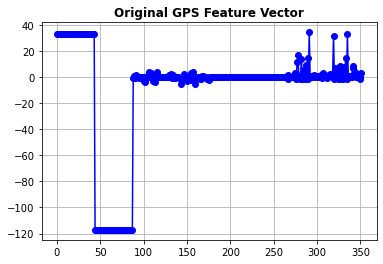

In [257]:
plt.plot(all_features[i], color='blue', marker='o')
plt.title('Original GPS Feature Vector', fontweight='bold')
plt.grid()


In [258]:
from sklearn.preprocessing import PowerTransformer
from pandas import DataFrame

In [259]:
pt = PowerTransformer(method='yeo-johnson')
data = pt.fit_transform(X)
# histograms of the variables
plt.plot(data, color='lightblue', marker='o')
plt.title('Transformed GPS feature vector', fontweight='bold')
plt.grid()

/Users/user/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3202: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/Users/user/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


ValueError: Input contains infinity or a value too large for dtype('float64').

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Y1 = ['Home']*(5)
Y2 = ['Office']*(5)
Y3 = ['Outdoor']*(5)

In [ ]:
Y = np.concatenate((Y1, Y2, Y3))
Y

In [2]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

NameError: name 'X' is not defined

In [ ]:
x_train.shape, x_test.shape

In [2]:
sample_user = pd.read_csv('/Users/user/Desktop/ExtraSensory.per_uuid_features_labels/1155FF54-63D3-4AB2-9863-8385D0BD0A13.features_labels.csv')

In [3]:
def get_sensor_names_from_features(feature_names):
    feat_sensor_names = np.array([None for feat in feature_names]);
    for (fi,feat) in enumerate(feature_names):
        if feat.startswith('raw_acc'):
            feat_sensor_names[fi] = 'Acc';
            pass;
        elif feat.startswith('proc_gyro'):
            feat_sensor_names[fi] = 'Gyro';
            pass;
        elif feat.startswith('raw_magnet'):
            feat_sensor_names[fi] = 'Magnet';
            pass;
        elif feat.startswith('watch_acceleration'):
            feat_sensor_names[fi] = 'WAcc';
            pass;
        elif feat.startswith('watch_heading'):
            feat_sensor_names[fi] = 'Compass';
            pass;
        elif feat.startswith('location'):
            feat_sensor_names[fi] = 'Loc';
            pass;
        elif feat.startswith('location_quick_features'):
            feat_sensor_names[fi] = 'Loc';
            pass;
        elif feat.startswith('audio_naive'):
            feat_sensor_names[fi] = 'Aud';
            pass;
        elif feat.startswith('audio_properties'):
            feat_sensor_names[fi] = 'AP';
            pass;
        elif feat.startswith('discrete'):
            feat_sensor_names[fi] = 'PS';
            pass;
        elif feat.startswith('lf_measurements'):
            feat_sensor_names[fi] = 'LF';
            pass;
        else:
            raise ValueError("!!! Unsupported feature name: %s" % feat);

        pass;

    return feat_sensor_names;  

'''
Read the data (precomputed sensor-features and labels) for a user.
This function assumes the user's data file is present.
'''
def validate_column_names_are_consistent(old_column_names,new_column_names):
    if len(old_column_names) != len(new_column_names):
        raise ValueError("!!! Inconsistent number of columns.");
        
    for ci in range(len(old_column_names)):
        if old_column_names[ci] != new_column_names[ci]:
            raise ValueError("!!! Inconsistent column %d) %s != %s" % (ci,old_column_names[ci],new_column_names[ci]));
        pass;
    return;
def get_label_pretty_name(label):
    if 'FIX_walking' in label:
        return 'Walking';
    if 'FIX_running' in label:
        return 'Running';
    if 'LOC_main_workplace' in label:
        return 'At main workplace' ;
    if 'OR_indoors' in label:
        return 'Indoors';
    if 'OR_outside' in label:
        return 'Outside';
    if 'LOC_home' in label:
        return 'At home';
    if 'FIX_restaurant' in label:
        return 'At a restaurant';
    if 'OR_exercise' in label:
        return 'Exercise';
    if  'LOC_beach' in label:
        return 'At the beach';
    if 'OR_standing' in label:
        return 'Standing';
    if 'WATCHING_TV' in label:
        return 'Watching TV'
    else:
        label.replace('label:', '')
    if label.endswith('_'):
        label = label[:-1] + ')';
        pass;
    
    label = label.replace('__',' (').replace('_',' ');
    label = label[0] + label[1:].lower();
    label = label.replace('i m','I\'m');
    return label;

def get_phone_label(label):
    if label == 'FIX_walking':
        return 'Walking';
    if label == 'FIX_running':
        return 'Running';
    if label == 'LOC_main_workplace':
        return 'At main workplace';
    if label == 'OR_indoors':
        return 'Indoors';
    if label == 'OR_outside':
        return 'Outside';
    if label == 'LOC_home':
        return 'At home';
    if label == 'FIX_restaurant':
        return 'At a restaurant';
    if label == 'OR_exercise':
        return 'Exercise';
    if label == 'LOC_beach':
        return 'At the beach';
    if label == 'OR_standing':
        return 'Standing';
    if label == 'WATCHING_TV':
        return 'Watching TV'
    
    if label.endswith('_'):
        label = label[:-1] + ')';
        pass;
    
    label = label.replace('__',' (').replace('_',' ');
    label = label[0] + label[1:].lower();
    label = label.replace('i m','I\'m');
    
    # if lable is phone related then return the label
    if "Phone" not in label: 
        return label
    else:
        return False


def get_sensor_names_from_features(feature_names):
    feat_sensor_names = np.array([None for feat in feature_names]);
    for (fi,feat) in enumerate(feature_names):
        if feat.startswith('raw_acc'):
            feat_sensor_names[fi] = 'Acc';
            pass;
        elif feat.startswith('proc_gyro'):
            feat_sensor_names[fi] = 'Gyro';
            pass;
        elif feat.startswith('raw_magnet'):
            feat_sensor_names[fi] = 'Magnet';
            pass;
        elif feat.startswith('watch_acceleration'):
            feat_sensor_names[fi] = 'WAcc';
            pass;
        elif feat.startswith('watch_heading'):
            feat_sensor_names[fi] = 'Compass';
            pass;
        elif feat.startswith('location'):
            feat_sensor_names[fi] = 'Loc';
            pass;
        elif feat.startswith('location_quick_features'):
            feat_sensor_names[fi] = 'Loc';
            pass;
        elif feat.startswith('audio_naive'):
            feat_sensor_names[fi] = 'Aud';
            pass;
        elif feat.startswith('audio_properties'):
            feat_sensor_names[fi] = 'AP';
            pass;
        elif feat.startswith('discrete'):
            feat_sensor_names[fi] = 'PS';
            pass;
        elif feat.startswith('lf_measurements'):
            feat_sensor_names[fi] = 'LF';
            pass;
        else:
            raise ValueError("!!! Unsupported feature name: %s" % feat);

        pass;

    return feat_sensor_names;  

def get_features_from_data(users_df):
    for (ci,col) in enumerate(users_df.columns):
        if col.startswith('label:'):
            first_label_ind = ci;
            break;
    pass;
    feature_names = users_df.columns[1:first_label_ind];
    return np.array(feature_names)

def project_features_to_selected_sensors(feature_names,sensors_to_use):

    feature_names_arr = []
    for sensor in sensors_to_use:
        if sensor == 'Acc':
            for feature in feature_names:
                #print (type(feature))
                if (feature.startswith('raw_acc')):
                    feature_names_arr.append(feature)
        elif sensor == 'WAcc':
            for feature in feature_names:
                if (feature.startswith('watch_acceleration')):
                    feature_names_arr.append(feature)
        elif sensor == 'Gyro':
            for feature in feature_names:
                if (feature.startswith('proc_gyro')):
                    feature_names_arr.append(feature)
        elif sensor == 'Magnet':
            for feature in feature_names:
                if (feature.startswith('raw_magnet')):
                    feature_names_arr.append(feature)
        elif sensor == 'Compass':
            for feature in feature_names:
                if (feature.startswith('watch_heading')):
                    feature_names_arr.append(feature)
        elif sensor == 'Loc':
            for feature in feature_names:
                if (feature.startswith('location')):
                    feature_names_arr.append(feature)
        elif sensor == 'Aud':
            for feature in feature_names:
                if (feature.startswith('audio_naive')):
                    feature_names_arr.append(feature)
        elif sensor == 'AP':
            for feature in feature_names:
                if (feature.startswith('audio_properties')):
                    feature_names_arr.append(feature)
        elif sensor == 'PS':
            for feature in feature_names:
                if (feature.startswith('discrete')):
                    feature_names_arr.append(feature)
        elif sensor == 'LF':
            for feature in feature_names:
                if (feature.startswith('lf_measurements')):
                    feature_names_arr.append(feature)
                    
    return feature_names_arr

def estimate_standardization_params(X):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        mean_vec = np.nanmean(X,axis=0);
        std_vec = np.nanstd(X,axis=0);
        return (mean_vec,std_vec);

def standardize_features(X,mean_vec,std_vec):
    # Subtract the mean, to centralize all features around zero:
    X_centralized = X - mean_vec.reshape((1,-1));
    # Divide by the standard deviation, to get unit-variance for all features:
    # * Avoid dividing by zero, in case some feature had estimate of zero variance
    normalizers = np.where(std_vec > 0., std_vec, 1.).reshape((1,-1));
    X_standard = X_centralized / normalizers;
    return X_standard;

def get_label_names(users_df):
    # Search for the column of the first label:
    for (ci,col) in enumerate(users_df.columns):
        if col.startswith('label:'):
            first_label_ind = ci;
            break;
        pass;

    label_names = np.array(users_df.columns[first_label_ind:-1]);
    for (li,label) in enumerate(label_names):
        # In the CSV the label names appear with prefix 'label:', but we don't need it after reading the data:
        assert label.startswith('label:');
        #label_names[li] = label.replace('label:','');
        pass;
    
    return (list(label_names));

def print_accuracy_repoprt(predictions, y_test):

    accuracy = np.mean(predictions == y_test);
    # Count occorrences of true-positive, true-negative, false-positive, and false-negative:
    tp = np.sum(np.logical_and(predictions,y_test));
    tn = np.sum(np.logical_and(np.logical_not(predictions),np.logical_not(y_test)));
    fp = np.sum(np.logical_and(predictions,np.logical_not(y_test)));
    fn = np.sum(np.logical_and(np.logical_not(predictions),y_test));

    # Sensitivity (=recall=true positive rate) and Specificity (=true negative rate):
    sensitivity = float(tp) / (tp+fn);
    specificity = float(tn) / (tn+fp);

    # Balanced accuracy is a more fair replacement for the naive accuracy:
    balanced_accuracy = (sensitivity + specificity) / 2.;

    # Precision:
    # Beware from this metric, since it may be too sensitive to rare labels.
    # In the ExtraSensory Dataset, there is large skew among the positive and negative classes,
    # and for each label the pos/neg ratio is different.
    # This can cause undesirable and misleading results when averaging precision across different labels.
    precision = float(tp) / (tp+fp);
    accuracy_list = [accuracy,sensitivity,specificity,balanced_accuracy,precision]
    print("-"*10);
    print('Accuracy*:         %.2f' % accuracy);
    print('Sensitivity (TPR): %.2f' % sensitivity);
    print('Specificity (TNR): %.2f' % specificity);
    print('Balanced accuracy: %.2f' % balanced_accuracy);
    print('Precision**:       %.2f' % precision);
    print("-"*10);
    #print('* The accuracy metric is misleading - it is dominated by the negative examples (typically there are many more negatives).')
    #print('** Precision is very sensitive to rare labels. It can cause misleading results when averaging precision over different labels.')
    return accuracy_list

In [4]:
def prepare_X_Y_for_ML(users_df):
    # prepare data for machine learning
    # 1. get all features available
    feature_names = get_features_from_data(users_df)

    # 2. get the features sensors feat from features
    feat_sensor_names = get_sensor_names_from_features(feature_names);
        
    # 3. select the sensors to use in the machine learning
    #sensors_to_use = ['Acc','WAcc'];

    # 4. get Data accoring to selected sensors with feaures;
    #feature_names_arr = []
    #feature_names_arr = project_features_to_selected_sensors(feature_names, sensors_to_use)
    X = users_df[feature_names]
    # 5. stanrdize the features substracting the mean value and dividing by standard deviation
    # so that all their values will be roughly in the same range:
    (mean_vec,std_vec) = estimate_standardization_params(X);
    X = standardize_features(X,mean_vec,std_vec);
    X[np.isnan(X)] = 0.
    # 6. X is ready for training
    # 7. Prepare Y target lables for training
    label_names = get_label_names(users_df)
    Y = users_df[label_names]
    # 8. clean nan values and converted to binary labels
    # Read the binary label values, and the 'missing label' indicators:
    trinary_labels_mat = users_df[label_names]; # This should have values of either 0., 1. or NaN
    M = np.isnan(trinary_labels_mat); # M is the missing label matrix
    Y = np.where(M,0,trinary_labels_mat) > 0.; # Y is the label matrix
    y_df = pd.DataFrame(Y)
    y_df.rename(columns=dict(enumerate(label_names, 0)), inplace = True)
    return (X,y_df,M,feature_names,label_names)

In [5]:
sample_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Columns: 278 entries, timestamp to label_source
dtypes: float64(274), int64(4)
memory usage: 5.7 MB


In [6]:
(X,Y,M,feature_names,label_names) = prepare_X_Y_for_ML(sample_user)
XY = pd.concat([X, Y], axis=1, sort=False)
XY.head()

,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,...,label:STAIRS_-_GOING_UP,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS
0,-0.004166,-0.214889,-0.003052,-0.087991,0.273895,0.086134,-0.157025,-2.102366,0.226534,0.310119,...,False,False,False,False,False,False,False,False,True,False
1,-0.014938,-0.247326,-0.381022,-0.269487,0.277033,0.089902,-0.149119,-0.676587,0.228113,0.228730,...,False,False,False,False,False,False,False,False,True,False
2,0.100089,-0.159482,-0.420238,-0.102435,0.230967,0.223521,-0.082896,-1.156087,0.222563,0.252353,...,False,False,False,False,False,False,False,False,True,False
3,0.177281,-0.176301,-0.024567,-0.105843,0.268802,0.333106,-0.069397,-1.200039,0.223998,0.236435,...,False,False,False,False,False,False,False,False,True,False
4,0.313695,-0.113463,-0.476969,-0.117663,0.270961,0.522589,-0.004443,-0.311339,0.218304,0.222963,...,False,False,False,False,False,False,False,False,True,False


In [7]:
import seaborn
import matplotlib.pyplot as plt
  

In [8]:
print("Number of columns in the database =", sample_user.columns.size)
for column in sample_user.columns:
    print (column)

Number of columns in the database = 278
timestamp
raw_acc:magnitude_stats:mean
raw_acc:magnitude_stats:std
raw_acc:magnitude_stats:moment3
raw_acc:magnitude_stats:moment4
raw_acc:magnitude_stats:percentile25
raw_acc:magnitude_stats:percentile50
raw_acc:magnitude_stats:percentile75
raw_acc:magnitude_stats:value_entropy
raw_acc:magnitude_stats:time_entropy
raw_acc:magnitude_spectrum:log_energy_band0
raw_acc:magnitude_spectrum:log_energy_band1
raw_acc:magnitude_spectrum:log_energy_band2
raw_acc:magnitude_spectrum:log_energy_band3
raw_acc:magnitude_spectrum:log_energy_band4
raw_acc:magnitude_spectrum:spectral_entropy
raw_acc:magnitude_autocorrelation:period
raw_acc:magnitude_autocorrelation:normalized_ac
raw_acc:3d:mean_x
raw_acc:3d:mean_y
raw_acc:3d:mean_z
raw_acc:3d:std_x
raw_acc:3d:std_y
raw_acc:3d:std_z
raw_acc:3d:ro_xy
raw_acc:3d:ro_xz
raw_acc:3d:ro_yz
proc_gyro:magnitude_stats:mean
proc_gyro:magnitude_stats:std
proc_gyro:magnitude_stats:moment3
proc_gyro:magnitude_stats:moment4
proc_

In [9]:
corr = Y[label_names].corr().sort_values(by=label_names, ascending=False)
corr

,label:LYING_DOWN,label:SITTING,label:FIX_walking,label:FIX_running,label:BICYCLING,label:SLEEPING,label:LAB_WORK,label:IN_CLASS,label:IN_A_MEETING,label:LOC_main_workplace,...,label:STAIRS_-_GOING_UP,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS
label:LYING_DOWN,1.000000,-0.722330,-0.155386,-0.011995,NaN,0.878115,NaN,NaN,-0.055173,-0.330135,...,-0.011995,-0.011995,NaN,-0.190658,-0.068248,0.010538,NaN,0.255237,-0.110295,-0.127828
label:SLEEPING,0.878115,-0.631401,-0.138880,-0.010721,NaN,1.000000,NaN,NaN,-0.049312,-0.295066,...,-0.010721,-0.010721,NaN,-0.170405,-0.060999,-0.112601,NaN,0.281964,-0.098579,-0.114249
label:LOC_home,0.578682,-0.467315,-0.246305,-0.020728,NaN,0.503136,NaN,NaN,-0.095343,-0.570495,...,-0.020728,-0.020728,NaN,0.109943,-0.117938,0.031560,NaN,0.365851,-0.190597,-0.220895
label:OR_indoors,0.571356,-0.467428,-0.259254,-0.020994,NaN,0.510663,NaN,NaN,-0.096565,-0.577809,...,-0.020994,-0.020994,NaN,0.135476,-0.119450,0.029015,NaN,0.357030,-0.193041,-0.223727
label:PHONE_ON_TABLE,0.255237,0.044930,-0.461669,-0.035638,NaN,0.281964,NaN,NaN,-0.163926,0.199732,...,-0.035638,-0.035638,NaN,-0.087554,-0.202774,-0.374311,NaN,1.000000,-0.270844,-0.348246
label:PHONE_IN_HAND,0.010538,-0.011279,-0.001931,-0.003913,NaN,-0.112601,NaN,NaN,-0.018000,-0.015380,...,0.095210,-0.003913,NaN,0.006005,-0.022266,1.000000,NaN,-0.374311,-0.035983,-0.041703
label:STAIRS_-_GOING_DOWN,-0.011995,-0.022437,0.077194,-0.000373,NaN,-0.010721,NaN,NaN,-0.001714,-0.010254,...,-0.000373,1.000000,NaN,-0.005922,-0.002120,-0.003913,NaN,-0.035638,-0.003426,-0.003971
label:STAIRS_-_GOING_UP,-0.011995,-0.022437,0.077194,-0.000373,NaN,-0.010721,NaN,NaN,-0.001714,-0.010254,...,1.000000,-0.000373,NaN,-0.005922,-0.002120,0.095210,NaN,-0.035638,-0.003426,-0.003971
label:OR_exercise,-0.011995,-0.022437,-0.004827,1.000000,NaN,-0.010721,NaN,NaN,-0.001714,-0.010254,...,-0.000373,-0.000373,NaN,-0.005922,-0.002120,-0.003913,NaN,-0.035638,-0.003426,-0.003971
label:FIX_running,-0.011995,-0.022437,-0.004827,1.000000,NaN,-0.010721,NaN,NaN,-0.001714,-0.010254,...,-0.000373,-0.000373,NaN,-0.005922,-0.002120,-0.003913,NaN,-0.035638,-0.003426,-0.003971


In [10]:
corr.dropna(how='all')

,label:LYING_DOWN,label:SITTING,label:FIX_walking,label:FIX_running,label:BICYCLING,label:SLEEPING,label:LAB_WORK,label:IN_CLASS,label:IN_A_MEETING,label:LOC_main_workplace,...,label:STAIRS_-_GOING_UP,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS
label:LYING_DOWN,1.000000,-0.722330,-0.155386,-0.011995,NaN,0.878115,NaN,NaN,-0.055173,-0.330135,...,-0.011995,-0.011995,NaN,-0.190658,-0.068248,0.010538,NaN,0.255237,-0.110295,-0.127828
label:SLEEPING,0.878115,-0.631401,-0.138880,-0.010721,NaN,1.000000,NaN,NaN,-0.049312,-0.295066,...,-0.010721,-0.010721,NaN,-0.170405,-0.060999,-0.112601,NaN,0.281964,-0.098579,-0.114249
label:LOC_home,0.578682,-0.467315,-0.246305,-0.020728,NaN,0.503136,NaN,NaN,-0.095343,-0.570495,...,-0.020728,-0.020728,NaN,0.109943,-0.117938,0.031560,NaN,0.365851,-0.190597,-0.220895
label:OR_indoors,0.571356,-0.467428,-0.259254,-0.020994,NaN,0.510663,NaN,NaN,-0.096565,-0.577809,...,-0.020994,-0.020994,NaN,0.135476,-0.119450,0.029015,NaN,0.357030,-0.193041,-0.223727
label:PHONE_ON_TABLE,0.255237,0.044930,-0.461669,-0.035638,NaN,0.281964,NaN,NaN,-0.163926,0.199732,...,-0.035638,-0.035638,NaN,-0.087554,-0.202774,-0.374311,NaN,1.000000,-0.270844,-0.348246
label:PHONE_IN_HAND,0.010538,-0.011279,-0.001931,-0.003913,NaN,-0.112601,NaN,NaN,-0.018000,-0.015380,...,0.095210,-0.003913,NaN,0.006005,-0.022266,1.000000,NaN,-0.374311,-0.035983,-0.041703
label:STAIRS_-_GOING_DOWN,-0.011995,-0.022437,0.077194,-0.000373,NaN,-0.010721,NaN,NaN,-0.001714,-0.010254,...,-0.000373,1.000000,NaN,-0.005922,-0.002120,-0.003913,NaN,-0.035638,-0.003426,-0.003971
label:STAIRS_-_GOING_UP,-0.011995,-0.022437,0.077194,-0.000373,NaN,-0.010721,NaN,NaN,-0.001714,-0.010254,...,1.000000,-0.000373,NaN,-0.005922,-0.002120,0.095210,NaN,-0.035638,-0.003426,-0.003971
label:OR_exercise,-0.011995,-0.022437,-0.004827,1.000000,NaN,-0.010721,NaN,NaN,-0.001714,-0.010254,...,-0.000373,-0.000373,NaN,-0.005922,-0.002120,-0.003913,NaN,-0.035638,-0.003426,-0.003971
label:FIX_running,-0.011995,-0.022437,-0.004827,1.000000,NaN,-0.010721,NaN,NaN,-0.001714,-0.010254,...,-0.000373,-0.000373,NaN,-0.005922,-0.002120,-0.003913,NaN,-0.035638,-0.003426,-0.003971


In [11]:
corr.dropna(how='all').style.background_gradient(cmap='coolwarm', axis=None)

,label:LYING_DOWN,label:SITTING,label:FIX_walking,label:FIX_running,label:BICYCLING,label:SLEEPING,label:LAB_WORK,label:IN_CLASS,label:IN_A_MEETING,label:LOC_main_workplace,label:OR_indoors,label:OR_outside,label:IN_A_CAR,label:ON_A_BUS,label:DRIVE_-_I_M_THE_DRIVER,label:DRIVE_-_I_M_A_PASSENGER,label:LOC_home,label:FIX_restaurant,label:PHONE_IN_POCKET,label:OR_exercise,label:COOKING,label:SHOPPING,label:STROLLING,label:DRINKING__ALCOHOL_,label:BATHING_-_SHOWER,label:CLEANING,label:DOING_LAUNDRY,label:WASHING_DISHES,label:WATCHING_TV,label:SURFING_THE_INTERNET,label:AT_A_PARTY,label:AT_A_BAR,label:LOC_beach,label:SINGING,label:TALKING,label:COMPUTER_WORK,label:EATING,label:TOILET,label:GROOMING,label:DRESSING,label:AT_THE_GYM,label:STAIRS_-_GOING_UP,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS
label:LYING_DOWN,1.000000,-0.722330,-0.155386,-0.011995,nan,0.878115,nan,nan,-0.055173,-0.330135,0.571356,-0.137891,-0.066056,-0.078336,-0.071416,-0.053833,0.578682,-0.020783,-0.257704,-0.011995,-0.082946,-0.026841,-0.029409,-0.063792,-0.039857,nan,-0.020783,-0.082044,-0.196528,-0.076639,nan,nan,nan,-0.029409,-0.232213,-0.112359,-0.224510,-0.071416,-0.072443,-0.091519,nan,-0.011995,-0.011995,nan,-0.190658,-0.068248,0.010538,nan,0.255237,-0.110295,-0.127828
label:SLEEPING,0.878115,-0.631401,-0.138880,-0.010721,nan,1.000000,nan,nan,-0.049312,-0.295066,0.510663,-0.123243,-0.059039,-0.070015,-0.063830,-0.048115,0.503136,-0.018576,-0.230329,-0.010721,-0.074135,-0.023990,-0.026285,-0.057016,-0.035623,nan,-0.018576,-0.073328,-0.180699,-0.174807,nan,nan,nan,-0.026285,-0.314853,-0.100424,-0.200661,-0.063830,-0.064748,-0.081797,nan,-0.010721,-0.010721,nan,-0.170405,-0.060999,-0.112601,nan,0.281964,-0.098579,-0.114249
label:LOC_home,0.578682,-0.467315,-0.246305,-0.020728,nan,0.503136,nan,nan,-0.095343,-0.570495,0.978348,-0.238285,-0.114150,-0.129352,-0.123412,-0.093028,1.000000,-0.035915,-0.424226,-0.020728,0.107215,-0.046384,-0.050820,0.022084,0.059727,nan,0.031145,0.122946,0.302967,0.066217,nan,nan,nan,0.044070,-0.311100,-0.194164,0.023307,0.008263,0.108559,0.137145,nan,-0.020728,-0.020728,nan,0.109943,-0.117938,0.031560,nan,0.365851,-0.190597,-0.220895
label:OR_indoors,0.571356,-0.467428,-0.259254,-0.020994,nan,0.510663,nan,nan,-0.096565,-0.577809,1.000000,-0.241340,-0.115613,-0.131082,-0.124994,-0.094220,0.978348,-0.036376,-0.408789,-0.020994,0.105625,-0.046978,-0.051472,0.020801,0.058971,nan,0.030751,0.121389,0.299132,0.062283,nan,nan,nan,0.043512,-0.323839,-0.196654,0.018739,0.105665,0.107184,0.135408,nan,-0.020994,-0.020994,nan,0.135476,-0.119450,0.029015,nan,0.357030,-0.193041,-0.223727
label:PHONE_ON_TABLE,0.255237,0.044930,-0.461669,-0.035638,nan,0.281964,nan,nan,-0.163926,0.199732,0.357030,-0.409690,-0.001654,-0.232745,0.007359,-0.056512,0.365851,-0.061750,-0.765668,-0.035638,0.011260,-0.079749,-0.087376,-0.031948,0.034738,nan,0.018114,0.057801,0.158075,-0.043823,nan,nan,nan,0.025632,-0.553267,0.097930,-0.043657,-0.133777,0.032209,0.067427,nan,-0.035638,-0.035638,nan,-0.087554,-0.202774,-0.374311,nan,1.000000,-0.270844,-0.348246
label:PHONE_IN_HAND,0.010538,-0.011279,-0.001931,-0.003913,nan,-0.112601,nan,nan,-0.018000,-0.015380,0.029015,0.000232,-0.021550,-0.025557,-0.023299,-0.017563,0.031560,-0.006780,-0.084074,-0.003913,-0.027061,-0.008757,-0.009594,-0.020812,-0.013003,nan,-0.006780,-0.026766,-0.065958,0.356955,nan,nan,nan,-0.009594,0.045564,-0.036656,-0.073245,0.094735,-0.023634,-0.029857,nan,0.095210,-0.003913,nan,0.006005,-0.022266,1.000000,nan,-0.374311,-0.035983,-0.041703
label:STAIRS_-_GOING_DOWN,-0.011995,-0.022437,0.077194,-0.000373,nan,-0.010721,nan,nan,-0.001714,-0.010254,-0.020994,-0.004283,-0.002052,-0.002433,-0.002218,-0.001672,-0.020728,-0.000646,0.046545,-0.000373,-0.002576,-0.000834,-0.000913,-0.001981,-0.001238,nan,-0.000646,-0.002548,-0.006280,-0.006075,nan,nan,nan,-0.000913,-0.010942,-0.0

In [12]:
path = '/Users/user/Desktop/ExtraSensory.per_uuid_features_labels' # use your path
csv_files = glob.glob(path + "/*.csv")

fifty_users_files = []
ten_users_files = [] 
list_user_files = []
i = 1
for file in csv_files:
    user_data = pd.read_csv(file)
    list_user_files.append(user_data)
    if i <= 50:
        fifty_users_files.append(user_data)
    else:
        ten_users_files.append(user_data)
    i = i + 1

all_users_data = pd.concat(list_user_files, axis=0, ignore_index=True)
fifty_users_data = pd.concat(fifty_users_files, axis=0, ignore_index=True)
ten_users_data = pd.concat(ten_users_files, axis=0, ignore_index=True)

In [13]:
(X_all,Y_all,M_all,feature_names,label_names) = prepare_X_Y_for_ML(all_users_data)

In [14]:
corr_all = Y_all[label_names].corr().sort_values(by=label_names, ascending=False)
corr_all

,label:LYING_DOWN,label:SITTING,label:FIX_walking,label:FIX_running,label:BICYCLING,label:SLEEPING,label:LAB_WORK,label:IN_CLASS,label:IN_A_MEETING,label:LOC_main_workplace,...,label:STAIRS_-_GOING_UP,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS
label:LYING_DOWN,1.000000,-0.464625,-0.154196,-0.033246,-0.071722,0.827028,-0.061988,-0.079243,-0.072679,-0.187983,...,-0.028435,-0.028003,-0.014224,-0.206038,-0.213235,-0.052557,-0.082895,0.202879,-0.079991,-0.101745
label:SLEEPING,0.827028,-0.371499,-0.132618,-0.028593,-0.061686,1.000000,-0.053922,-0.068154,-0.062509,-0.161165,...,-0.024456,-0.024085,-0.012234,-0.172986,-0.167456,-0.069696,-0.066900,0.214865,-0.068797,-0.093157
label:OR_indoors,0.540231,-0.019494,-0.167607,-0.017138,-0.104020,0.542574,-0.038647,0.131027,-0.073960,-0.190917,...,-0.029264,-0.028337,0.005323,0.005486,-0.090021,0.012195,-0.064326,0.286070,-0.079347,-0.039787
label:LOC_home,0.430601,-0.137263,-0.141482,-0.030139,-0.085327,0.387510,-0.083773,-0.104557,-0.086740,-0.239729,...,-0.027654,-0.026202,-0.017364,-0.020257,-0.266813,-0.029658,-0.124192,0.212217,-0.106628,-0.125080
label:PHONE_ON_TABLE,0.202879,0.203678,-0.151942,-0.026526,-0.072575,0.214865,-0.026822,-0.033418,0.029318,0.127922,...,-0.022090,-0.021498,-0.015250,-0.065650,0.057880,-0.132730,-0.110386,1.000000,0.030805,-0.002123
label:ELEVATOR,-0.014224,-0.017322,0.051579,-0.001239,-0.002674,-0.012234,-0.002337,-0.002954,-0.002710,0.002821,...,0.109224,0.110933,1.000000,0.024157,0.037055,0.007336,0.044438,-0.015250,-0.002982,0.015300
label:LOC_beach,-0.021929,0.011863,0.000482,0.004155,-0.004575,-0.020933,-0.004000,-0.005055,-0.004637,-0.012389,...,-0.001814,-0.001786,-0.000907,-0.007085,0.003495,0.002589,0.068190,-0.026095,-0.005103,-0.006083
label:AT_A_BAR,-0.023620,0.043903,-0.009251,-0.002058,-0.004440,-0.020315,-0.003881,-0.004906,-0.004500,-0.012023,...,-0.001760,-0.001734,-0.000881,-0.001889,-0.013593,0.016828,0.011599,0.008145,0.062071,0.077639
label:DOING_LAUNDRY,-0.023728,-0.017390,0.003053,-0.002068,-0.004460,-0.020407,-0.003899,-0.004928,-0.004520,-0.012077,...,-0.001768,0.005894,-0.000885,0.086850,-0.013655,0.009153,-0.006403,-0.003077,-0.004975,-0.010175
label:SINGING,-0.025678,0.022034,0.026308,-0.002238,-0.004827,-0.022085,-0.004220,-0.005333,0.014366,0.034692,...,0.103733,0.105384,-0.000957,0.010598,0.005457,-0.005349,-0.006929,-0.014907,-0.005384,0.068972


In [15]:
corr_all.style.background_gradient(cmap='coolwarm', axis=None)

,label:LYING_DOWN,label:SITTING,label:FIX_walking,label:FIX_running,label:BICYCLING,label:SLEEPING,label:LAB_WORK,label:IN_CLASS,label:IN_A_MEETING,label:LOC_main_workplace,label:OR_indoors,label:OR_outside,label:IN_A_CAR,label:ON_A_BUS,label:DRIVE_-_I_M_THE_DRIVER,label:DRIVE_-_I_M_A_PASSENGER,label:LOC_home,label:FIX_restaurant,label:PHONE_IN_POCKET,label:OR_exercise,label:COOKING,label:SHOPPING,label:STROLLING,label:DRINKING__ALCOHOL_,label:BATHING_-_SHOWER,label:CLEANING,label:DOING_LAUNDRY,label:WASHING_DISHES,label:WATCHING_TV,label:SURFING_THE_INTERNET,label:AT_A_PARTY,label:AT_A_BAR,label:LOC_beach,label:SINGING,label:TALKING,label:COMPUTER_WORK,label:EATING,label:TOILET,label:GROOMING,label:DRESSING,label:AT_THE_GYM,label:STAIRS_-_GOING_UP,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS
label:LYING_DOWN,1.000000,-0.464625,-0.154196,-0.033246,-0.071722,0.827028,-0.061988,-0.079243,-0.072679,-0.187983,0.540231,-0.110912,-0.079065,-0.042691,-0.090761,-0.050707,0.430601,-0.046186,-0.150566,-0.083309,-0.064169,-0.043250,-0.028578,-0.038443,-0.046064,-0.062349,-0.023728,-0.035294,-0.038751,-0.075124,-0.038628,-0.023620,-0.021929,-0.025678,-0.175462,-0.190492,-0.114755,-0.050435,-0.055887,-0.047657,-0.034166,-0.028435,-0.028003,-0.014224,-0.206038,-0.213235,-0.052557,-0.082895,0.202879,-0.079991,-0.101745
label:SLEEPING,0.827028,-0.371499,-0.132618,-0.028593,-0.061686,1.000000,-0.053922,-0.068154,-0.062509,-0.161165,0.542574,-0.096751,-0.068001,-0.036717,-0.078060,-0.043611,0.387510,-0.039723,-0.133919,-0.078588,-0.055189,-0.037197,-0.024579,-0.033063,-0.039618,-0.053624,-0.020407,-0.030355,-0.100995,-0.112757,-0.033222,-0.020315,-0.020933,-0.022085,-0.152689,-0.173354,-0.113001,-0.043724,-0.047140,-0.039904,-0.029385,-0.024456,-0.024085,-0.012234,-0.172986,-0.167456,-0.069696,-0.066900,0.214865,-0.068797,-0.093157
label:OR_indoors,0.540231,-0.019494,-0.167607,-0.017138,-0.104020,0.542574,-0.038647,0.131027,-0.073960,-0.190917,1.000000,-0.178318,-0.107187,-0.062355,-0.120944,-0.073812,0.681321,-0.050040,-0.093585,-0.080538,0.064786,-0.047178,-0.045300,-0.001679,0.076166,0.057572,0.035778,0.045885,0.083797,0.111292,-0.008042,0.039056,-0.036560,0.002602,-0.030596,-0.057722,-0.003049,0.085338,0.072324,0.060760,0.056493,-0.029264,-0.028337,0.005323,0.005486,-0.090021,0.012195,-0.064326,0.286070,-0.079347,-0.039787
label:LOC_home,0.430601,-0.137263,-0.141482,-0.030139,-0.085327,0.387510,-0.083773,-0.104557,-0.086740,-0.239729,0.681321,-0.150310,-0.093128,-0.052492,-0.110576,-0.061068,1.000000,-0.058445,-0.142809,-0.094499,0.078917,-0.049267,-0.032105,-0.003739,0.048141,0.051803,0.043025,0.056532,0.103111,0.095810,-0.025443,-0.031420,-0.032522,-0.010897,-0.096727,-0.092052,-0.006279,0.047485,0.071672,0.061460,-0.034395,-0.027654,-0.026202,-0.017364,-0.020257,-0.266813,-0.029658,-0.124192,0.212217,-0.106628,-0.125080
label:PHONE_ON_TABLE,0.202879,0.203678,-0.151942,-0.026526,-0.072575,0.214865,-0.026822,-0.033418,0.029318,0.127922,0.286070,-0.101600,-0.067261,-0.045771,-0.057804,-0.048999,0.212217,-0.025904,-0.170279,-0.086513,0.001049,-0.046369,-0.030265,0.008276,0.000214,-0.020008,-0.003077,0.011385,0.094649,0.147301,-0.006759,0.008145,-0.026095,-0.014907,-0.000922,0.205919,0.032714,-0.013251,0.017699,0.016081,-0.021389,-0.022090,-0.021498,-0.015250,-0.065650,0.057880,-0.132730,-0.110386,1.000000,0.030805,-0.002123
label:ELEVATOR,-0.014224,-0.017322,0.051579,-0.001239,-0.002674,-0.012234,-0.002337,-0.002954,-0.002710,0.002821,0.005323,-0.004194,-0.002948,-0.001592,-0.003384,-0.001890,-0.017364,-0.001722,0.023678,-0.003407,-0.002392,-0.001612,-0.001065,-0.001433,-0.001717,-0.002324,-0.000885,-0.001316,-0.004403,-0.005363,-0.001440,-0.000881,-0.000907,-0.000957,-0.007512,-0.007715,-0.004939,-0.001938,-0.002084,-0.001777,-0.001274,0.109224,0.110933,1.000000,0.024157,0.037055,0.007336,0.044438,-0.015250,-0.0

In [16]:
n_examples_per_label = np.sum(np.array(Y),axis=0)
labels_and_counts = zip(label_names,n_examples_per_label)
sorted_labels_and_counts = sorted(labels_and_counts,reverse=True,key=lambda pair:pair[1])
print ("number of examples for every context label:")
print ("-"*20)
i = 0
label_x_arr = []
label_y_arr = []
for (label,count) in sorted_labels_and_counts:
    i = i +1
    label_x_arr.append(label)
    label_y_arr.append(count)
    print (" %i : %s - %d minutes"  % (i,label,count))
    pass;

number of examples for every context label:
--------------------
 1 : label:PHONE_ON_TABLE - 2076 minutes
 2 : label:SITTING - 1543 minutes
 3 : label:OR_indoors - 1455 minutes
 4 : label:LOC_home - 1438 minutes
 5 : label:LYING_DOWN - 748 minutes
 6 : label:TALKING - 653 minutes
 7 : label:SLEEPING - 633 minutes
 8 : label:LOC_main_workplace - 591 minutes
 9 : label:PHONE_IN_POCKET - 394 minutes
 10 : label:EATING - 310 minutes
 11 : label:WATCHING_TV - 257 minutes
 12 : label:SURFING_THE_INTERNET - 242 minutes
 13 : label:OR_standing - 231 minutes
 14 : label:FIX_walking - 158 minutes
 15 : label:OR_outside - 126 minutes
 16 : label:WITH_FRIENDS - 109 minutes
 17 : label:PHONE_IN_HAND - 106 minutes
 18 : label:COMPUTER_WORK - 85 minutes
 19 : label:WITH_CO-WORKERS - 82 minutes
 20 : label:DRESSING - 57 minutes
 21 : label:COOKING - 47 minutes
 22 : label:WASHING_DISHES - 46 minutes
 23 : label:ON_A_BUS - 42 minutes
 24 : label:GROOMING - 36 minutes
 25 : label:DRIVE_-_I_M_THE_DRIVER 

<AxesSubplot:xlabel='label'>

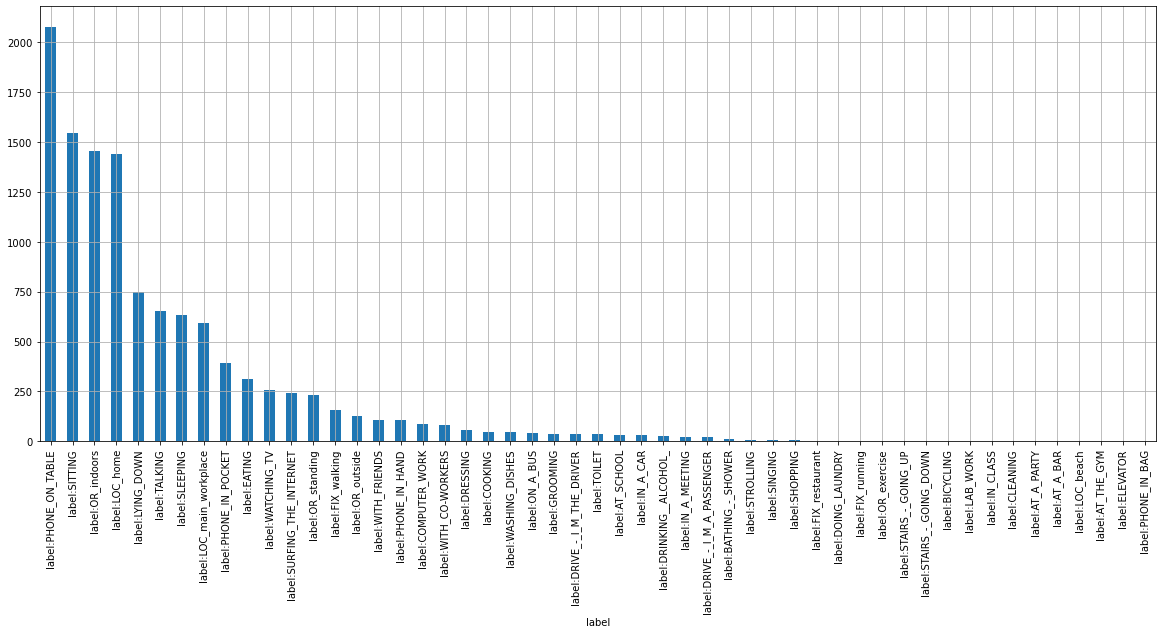

In [17]:
#X.isnull().values.any()
labels_df = pd.DataFrame(sorted_labels_and_counts)
labels_df.rename(columns = {0:'label'}, inplace = True) 
labels_df.rename(columns = {1:'count'}, inplace = True) 
labels_df.plot(x='label', y='count', kind='bar', legend=False, grid=True, figsize=(20, 8))

In [18]:
feat_sensor_names = get_sensor_names_from_features(feature_names)
print(pd.unique(feat_sensor_names))

['Acc' 'Gyro' 'Magnet' 'WAcc' 'Compass' 'Loc' 'Aud' 'AP' 'PS' 'LF']


In [19]:
features_of_selected_sensors =  project_features_to_selected_sensors(feature_names,['Acc', 'WAcc'])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X[features_of_selected_sensors], Y['label:FIX_walking'], test_size=0.30, random_state=42)

In [21]:
from sklearn.neural_network import MLPClassifier

In [22]:
from sklearn.metrics import confusion_matrix, auc, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score

In [76]:
arr_labels = ['label:WATCHING_TV','label:EATING','label:EATING', ]
mlp_logmodel_results = list()
for label in arr_labels:
    X_train, X_test, y_train, y_test = train_test_split(X[features_of_selected_sensors], Y[label], test_size=0.30, random_state=42)    
    logmodel = LogisticRegression(max_iter=200)
    logmodel.fit(X_train,y_train)
    predictions = logmodel.predict(X_test)
    print ("********************** "+label+" ******************")
    print(classification_report(y_test,predictions))
    mlp_logmodel_results.append(print_accuracy_repoprt(predictions,y_test))

********************** label:WATCHING_TV ******************
              precision    recall  f1-score   support

       False       0.91      0.98      0.94       726
        True       0.41      0.11      0.18        80

    accuracy                           0.90       806
   macro avg       0.66      0.55      0.56       806
weighted avg       0.86      0.90      0.87       806

----------
Accuracy*:         0.90
Sensitivity (TPR): 0.11
Specificity (TNR): 0.98
Balanced accuracy: 0.55
Precision**:       0.41
----------
********************** label:EATING ******************
              precision    recall  f1-score   support

       False       0.89      0.98      0.93       710
        True       0.41      0.09      0.15        96

    accuracy                           0.88       806
   macro avg       0.65      0.54      0.54       806
weighted avg       0.83      0.88      0.84       806

----------
Accuracy*:         0.88
Sensitivity (TPR): 0.09
Specificity (TNR): 0.98
Balanc

In [77]:

X_train, X_test, y_train, y_test = train_test_split(X[features_of_selected_sensors], Y, test_size=0.30, random_state=42) 


In [78]:
LogReg_pipeline = Pipeline([('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),])
for label in arr_labels:
    print('**Processing {} context label...**'.format(label))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(X_train, y_train[label])
    
    # calculating test accuracy
    predictions = LogReg_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(y_test[label], predictions)))
    print("\n")

**Processing label:WATCHING_TV context label...**
Test accuracy is 0.8957816377171216


**Processing label:EATING context label...**
Test accuracy is 0.8784119106699751


**Processing label:EATING context label...**
Test accuracy is 0.8784119106699751




In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 

In [80]:
scaler = StandardScaler()
scaler.fit(XY[features_of_selected_sensors])
scaled_features = scaler.transform(XY[features_of_selected_sensors])
df_feat = pd.DataFrame(scaled_features,columns=features_of_selected_sensors)
df_feat.head()

,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,...,watch_acceleration:spectrum:z_log_energy_band0,watch_acceleration:spectrum:z_log_energy_band1,watch_acceleration:spectrum:z_log_energy_band2,watch_acceleration:spectrum:z_log_energy_band3,watch_acceleration:spectrum:z_log_energy_band4,watch_acceleration:relative_directions:avr_cosine_similarity_lag_range0,watch_acceleration:relative_directions:avr_cosine_similarity_lag_range1,watch_acceleration:relative_directions:avr_cosine_similarity_lag_range2,watch_acceleration:relative_directions:avr_cosine_similarity_lag_range3,watch_acceleration:relative_directions:avr_cosine_similarity_lag_range4
0,-0.004166,-0.214889,-0.003052,-0.087991,0.273895,0.086134,-0.157025,-2.102366,0.226534,0.310119,...,-2.190380e-15,0.0,1.795394e-17,-4.787716e-17,-2.393858e-17,-3.064138e-15,3.291555e-16,-2.782860e-16,7.929655e-17,-1.645777e-17
1,-0.014938,-0.247326,-0.381022,-0.269487,0.277033,0.089902,-0.149119,-0.676587,0.228113,0.228730,...,-2.190380e-15,0.0,1.795394e-17,-4.787716e-17,-2.393858e-17,-3.064138e-15,3.291555e-16,-2.782860e-16,7.929655e-17,-1.645777e-17
2,0.100089,-0.159482,-0.420238,-0.102435,0.230967,0.223521,-0.082896,-1.156087,0.222563,0.252353,...,-2.190380e-15,0.0,1.795394e-17,-4.787716e-17,-2.393858e-17,-3.064138e-15,3.291555e-16,-2.782860e-16,7.929655e-17,-1.645777e-17
3,0.177281,-0.176301,-0.024567,-0.105843,0.268802,0.333106,-0.069397,-1.200039,0.223998,0.236435,...,-2.190380e-15,0.0,1.795394e-17,-4.787716e-17,-2.393858e-17,-3.064138e-15,3.291555e-16,-2.782860e-16,7.929655e-17,-1.645777e-17
4,0.313695,-0.113463,-0.476969,-0.117663,0.270961,0.522589,-0.004443,-0.311339,0.218304,0.222963,...,-2.190380e-15,0.0,1.795394e-17,-4.787716e-17,-2.393858e-17,-3.064138e-15,3.291555e-16,-2.782860e-16,7.929655e-17,-1.645777e-17


In [81]:
mlp_knn_results = list()
for label in arr_labels:
    X_train, X_test, y_train, y_test = train_test_split(scaled_features,XY[label],test_size=0.30, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=17)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    print ("********************** "+label+" ******************")
    print('Test accuracy is {}'.format(accuracy_score(pred,y_test)))
    mlp_knn_results.append(print_accuracy_repoprt(pred,y_test))
    print("\n")

********************** label:WATCHING_TV ******************
Test accuracy is 0.9007444168734491
----------
Accuracy*:         0.90
Sensitivity (TPR): 0.01
Specificity (TNR): 1.00
Balanced accuracy: 0.51
Precision**:       0.50
----------


********************** label:EATING ******************
Test accuracy is 0.8870967741935484
----------
Accuracy*:         0.89
Sensitivity (TPR): 0.05
Specificity (TNR): 1.00
Balanced accuracy: 0.53
Precision**:       1.00
----------


********************** label:EATING ******************
Test accuracy is 0.8870967741935484
----------
Accuracy*:         0.89
Sensitivity (TPR): 0.05
Specificity (TNR): 1.00
Balanced accuracy: 0.53
Precision**:       1.00
----------




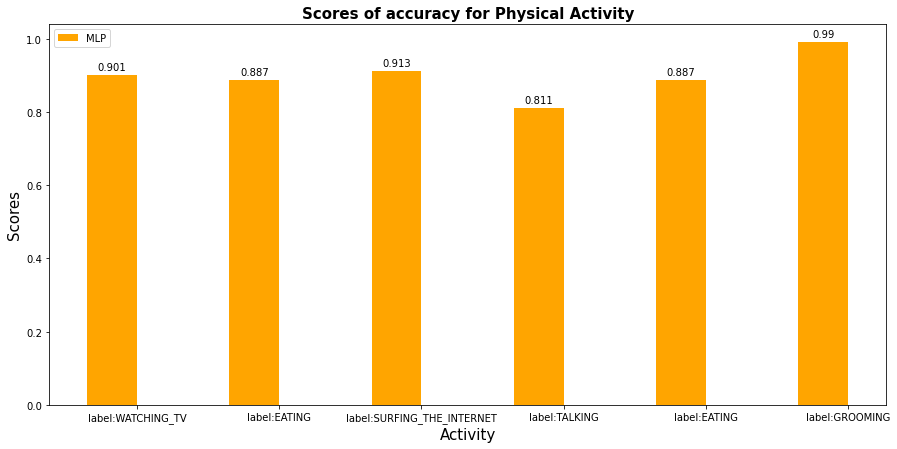

In [63]:
x_axis = np.arange(6)


#arr_labels = ['LYING_DOWN','LOC_home','LOC_main_workplace','SITTING','OR_standing','FIX_walking', 'SLEEPING']

width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(15, 7))

rects1 = ax.bar(x_axis - width/2 , np.round(np.array(mlp_knn_results)[:,0], decimals=3) , width, label='MLP', color='orange')
#rects2 = ax.bar(x_axis + 00.25, np.round(np.array(mlp_logmodel_results)[:,0], decimals=3) , width, label='MLP Logistic')
#rects2 = ax.bar(x_axis + width/2, np.round(logmodel_results, decimals=2) , width, label='Logistic Model')

ax.set_xticks(x_axis)
ax.set_ylabel('Scores', fontsize='15')
ax.set_xlabel('Activity', fontsize='15')
ax.set_title('Scores of accuracy for Physical Activity' , fontweight='bold', fontsize='15')
ax.set_xticklabels(arr_labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
#autolabel(rects2)

In [73]:
from sklearn import metrics

In [82]:
def plot_roc(y_test, pred):

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test.ravel(), pred.ravel())
    roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])
    plt.figure(figsize=(10,8))
    lw = 2
    plt.plot(fpr["micro"], tpr["micro"], color='red',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc["micro"])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for Locomotion Model', fontweight='bold')
    plt.legend(loc="lower right")
    plt.show()

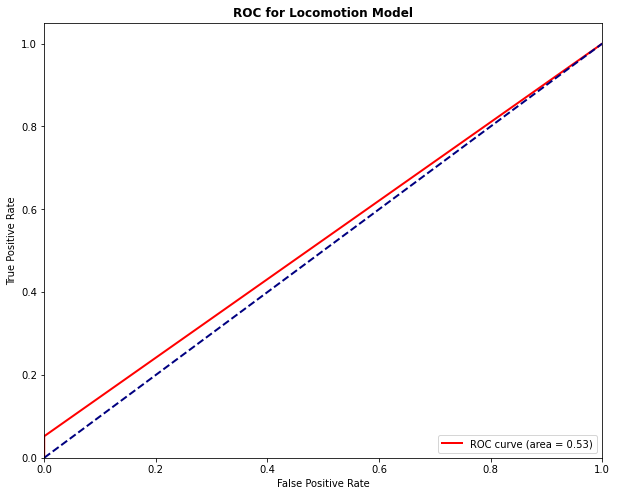

In [83]:
plot_roc(y_test, pred)

In [27]:
perf

,Precision,Recall,F Score
Micro Average,100.00%,100.00%,100.00%
Macro Average,100.00%,100.00%,100.00%


In [28]:
print("Accuracy: {0:0.2f}%".format(100*accuracy_score(y_test, predictions)))

Accuracy: 100.00%


In [562]:
print("Precision: {0:0.2f}%".format(100*precision_score(y_test, predictions, average="micro")))
print("Recall: {0:0.2f}%".format(100*recall_score(y_test, predictions, average="micro")))
print("f1_score: {0:0.2f}%".format(100*f1_score(y_test, predictions, average="micro")))

Precision: 92.18%
Recall: 92.18%
f1_score: 92.18%


In [563]:
print("Precision: {0:0.2f}%".format(100*precision_score(y_test, predictions, average="macro")))
print("Recall: {0:0.2f}%".format(100*recall_score(y_test, predictions, average="macro")))
print("f1_score: {0:0.2f}%".format(100*f1_score(y_test, predictions, average="macro")))

Precision: 91.41%
Recall: 87.10%
f1_score: 88.97%


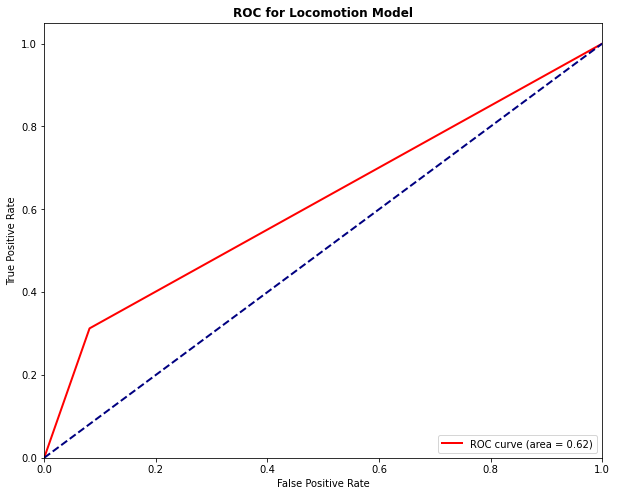

In [95]:
plot_roc(y_test, predictions)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X[features_of_selected_sensors], Y, test_size=0.30, random_state=42)    
    


In [52]:
scaler = StandardScaler()
scaler.fit(XY[features_of_selected_sensors])
scaled_features = scaler.transform(XY[features_of_selected_sensors])
df_feat = pd.DataFrame(scaled_features,columns=features_of_selected_sensors)

In [66]:
arr_labels = [
              'label:LOC_home',
              'label:OR_indoors',
              'label:OR_outside',
              'label:LOC_beach',
              
              ]
LogReg_pipeline = Pipeline([('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),])
for label in arr_labels:
    print('**Processing {} context label...**'.format(label))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(X_train, y_train[label])
    
    # calculating test accuracy
    predictions = LogReg_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(y_test[label], predictions)))
    print("\n")

**Processing label:LOC_home context label...**


KeyError: 'label:LOC_home'

In [54]:
arr_labels = [
              'label:LOC_home',
              'label:OR_indoors',
              'label:OR_outside',
              'label:LOC_beach',
              
              ]
mlp_knn_results = list()
for label in arr_labels:
    X_train, X_test, y_train, y_test = train_test_split(scaled_features,XY[label],test_size=0.30, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=17)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    print ("********************** "+label+" ******************")
    print('Test accuracy is {}'.format(accuracy_score(pred,y_test)))
    mlp_knn_results.append(print_accuracy_repoprt(pred,y_test))
    print("\n")

********************** label:LOC_home ******************
Test accuracy is 0.7878411910669976
----------
Accuracy*:         0.79
Sensitivity (TPR): 0.86
Specificity (TNR): 0.70
Balanced accuracy: 0.78
Precision**:       0.76
----------


********************** label:OR_indoors ******************
Test accuracy is 0.7791563275434243
----------
Accuracy*:         0.78
Sensitivity (TPR): 0.85
Specificity (TNR): 0.70
Balanced accuracy: 0.77
Precision**:       0.76
----------


********************** label:OR_outside ******************
Test accuracy is 0.9702233250620348
----------
Accuracy*:         0.97
Sensitivity (TPR): 0.61
Specificity (TNR): 0.98
Balanced accuracy: 0.80
Precision**:       0.61
----------


********************** label:LOC_beach ******************
Test accuracy is 1.0
----------
Accuracy*:         1.00
Sensitivity (TPR): nan
Specificity (TNR): 1.00
Balanced accuracy: nan
Precision**:       nan
----------




<ipython-input-3-42f543c5ec92>:273: RuntimeWarning: invalid value encountered in true_divide
  sensitivity = float(tp) / (tp+fn);
<ipython-input-3-42f543c5ec92>:284: RuntimeWarning: invalid value encountered in true_divide
  precision = float(tp) / (tp+fp);


In [67]:
perf=pd.DataFrame([["{0:0.2f}%".format(100*precision_score(y_test, predictions, average="micro")), 
                    "{0:0.2f}%".format(100*recall_score(y_test, predictions, average="micro")),
                    "{0:0.2f}%".format(100*f1_score(y_test, predictions, average="micro"))],
                  ["{0:0.2f}%".format(100*precision_score(y_test, predictions, average="macro")), 
                    "{0:0.2f}%".format(100*recall_score(y_test, predictions, average="macro")),
                    "{0:0.2f}%".format(100*f1_score(y_test, predictions, average="macro"))]], 
                  index=["Micro Average", "Macro Average"], columns=["Precision", "Recall", "F Score"])


In [68]:
print("Accuracy: {0:0.2f}%".format(100*accuracy_score(y_test, predictions)))

Accuracy: 100.00%


In [64]:
def plot_roc(y_test, predictions):

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test.ravel(), predictions.ravel())
    roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])
    plt.figure(figsize=(10,8))
    lw = 2
    plt.plot(fpr["micro"], tpr["micro"], color='red',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc["micro"])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for overall System', fontweight='bold')
    plt.legend(loc="lower right")
    plt.show()

/Users/user/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


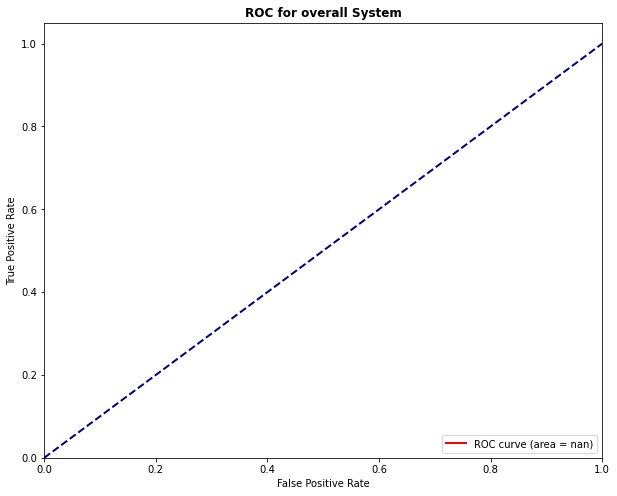

In [65]:
plot_roc(y_test, predictions)

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
mlp_knn_results = list()
for label in arr_labels:
    X_train, X_test, y_train, y_test = train_test_split(scaled_features,XY[label],test_size=0.30, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=17)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    print ("********************** "+label+" ******************")
    print('Test accuracy is {}'.format(accuracy_score(pred,y_test)))
    mlp_knn_results.append(print_accuracy_repoprt(pred,y_test))
    print("\n")

********************** label:BICYCLING ******************
Test accuracy is 1.0
----------
Accuracy*:         1.00
Sensitivity (TPR): nan
Specificity (TNR): 1.00
Balanced accuracy: nan
Precision**:       nan
----------


********************** label:SLEEPING ******************
Test accuracy is 0.8746898263027295
----------
Accuracy*:         0.87
Sensitivity (TPR): 0.74
Specificity (TNR): 0.92
Balanced accuracy: 0.83
Precision**:       0.75
----------


********************** label:LAB_WORK ******************
Test accuracy is 1.0
----------
Accuracy*:         1.00
Sensitivity (TPR): nan
Specificity (TNR): 1.00
Balanced accuracy: nan
Precision**:       nan
----------




<ipython-input-4-42f543c5ec92>:273: RuntimeWarning: invalid value encountered in true_divide
  sensitivity = float(tp) / (tp+fn);
<ipython-input-4-42f543c5ec92>:284: RuntimeWarning: invalid value encountered in true_divide
  precision = float(tp) / (tp+fp);
<ipython-input-4-42f543c5ec92>:273: RuntimeWarning: invalid value encountered in true_divide
  sensitivity = float(tp) / (tp+fn);
<ipython-input-4-42f543c5ec92>:284: RuntimeWarning: invalid value encountered in true_divide
  precision = float(tp) / (tp+fp);


********************** label:COOKING ******************
Test accuracy is 0.9838709677419355
----------
Accuracy*:         0.98
Sensitivity (TPR): 0.00
Specificity (TNR): 1.00
Balanced accuracy: 0.50
Precision**:       nan
----------


********************** label:SHOPPING ******************
Test accuracy is 0.9962779156327544
----------
Accuracy*:         1.00
Sensitivity (TPR): 0.00
Specificity (TNR): 1.00
Balanced accuracy: 0.50
Precision**:       nan
----------


********************** label:CLEANING ******************
Test accuracy is 1.0
----------
Accuracy*:         1.00
Sensitivity (TPR): nan
Specificity (TNR): 1.00
Balanced accuracy: nan
Precision**:       nan
----------




<ipython-input-4-42f543c5ec92>:284: RuntimeWarning: invalid value encountered in true_divide
  precision = float(tp) / (tp+fp);
<ipython-input-4-42f543c5ec92>:284: RuntimeWarning: invalid value encountered in true_divide
  precision = float(tp) / (tp+fp);
<ipython-input-4-42f543c5ec92>:273: RuntimeWarning: invalid value encountered in true_divide
  sensitivity = float(tp) / (tp+fn);
<ipython-input-4-42f543c5ec92>:284: RuntimeWarning: invalid value encountered in true_divide
  precision = float(tp) / (tp+fp);


********************** label:WATCHING_TV ******************
Test accuracy is 0.9007444168734491
----------
Accuracy*:         0.90
Sensitivity (TPR): 0.01
Specificity (TNR): 1.00
Balanced accuracy: 0.51
Precision**:       0.50
----------




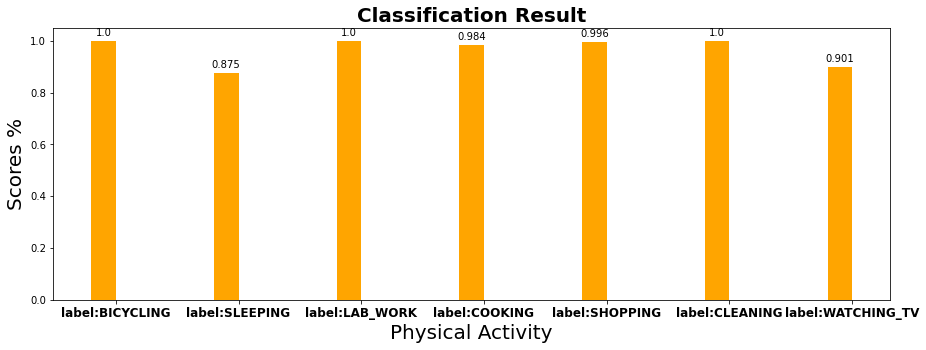

In [78]:
x_axis = np.arange(7)


#arr_labels = ['LYING_DOWN','LOC_home','LOC_main_workplace','SITTING','OR_standing','FIX_walking', 'SLEEPING']

width = 0.2  # the width of the bars
fig, ax = plt.subplots(figsize=(15, 5), )
rects1 = ax.bar(x_axis - width/2 , np.round(np.array(mlp_knn_results)[:,0], decimals=3) , width, color='orange')
#rects2 = ax.bar(x_axis + 00.25, np.round(np.array(mlp_logmodel_results)[:,0], decimals=3) , width, label='MLP Logistic',color='red')
#rects2 = ax.bar(x_axis + width/2, np.round(logmodel_results, decimals=2) , width, label='Logistic Model')

ax.set_xticks(x_axis)
ax.set_ylabel('Scores %', fontsize='20')
ax.set_xlabel('Physical Activity', fontsize='20')
ax.set_title('Classification Result', fontweight='bold', fontsize='20')
ax.set_xticklabels(arr_labels, fontsize='12', fontweight='bold')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
#autolabel(rects2)

In [79]:
perf=pd.DataFrame([["{0:0.2f}%".format(100*precision_score(y_test, predictions, average="micro")), 
                    "{0:0.2f}%".format(100*recall_score(y_test, predictions, average="micro")),
                    "{0:0.2f}%".format(100*f1_score(y_test, predictions, average="micro"))],
                  ["{0:0.2f}%".format(100*precision_score(y_test, predictions, average="macro")), 
                    "{0:0.2f}%".format(100*recall_score(y_test, predictions, average="macro")),
                    "{0:0.2f}%".format(100*f1_score(y_test, predictions, average="macro"))]], 
                  index=["Micro Average", "Macro Average"], columns=["Precision", "Recall", "F Score"])



In [80]:
print("Accuracy: {0:0.2f}%".format(100*accuracy_score(y_test, predictions)))

Accuracy: 85.86%


In [81]:
print("Precision: {0:0.2f}%".format(100*precision_score(y_test, predictions, average="micro")))
print("Recall: {0:0.2f}%".format(100*recall_score(y_test, predictions, average="micro")))
print("f1_score: {0:0.2f}%".format(100*f1_score(y_test, predictions, average="micro")))

Precision: 85.86%
Recall: 85.86%
f1_score: 85.86%


In [82]:
print("Precision: {0:0.2f}%".format(100*precision_score(y_test, predictions, average="macro")))
print("Recall: {0:0.2f}%".format(100*recall_score(y_test, predictions, average="macro")))
print("f1_score: {0:0.2f}%".format(100*f1_score(y_test, predictions, average="macro")))

Precision: 61.07%
Recall: 61.56%
f1_score: 61.31%


In [83]:
def plot_roc(y_test, predictions):

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test.ravel(), predictions.ravel())
    roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])
    plt.figure(figsize=(10,8))
    lw = 2
    plt.plot(fpr["micro"], tpr["micro"], color='red',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc["micro"])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for overall System', fontweight='bold')
    plt.legend(loc="lower right")
    plt.show()

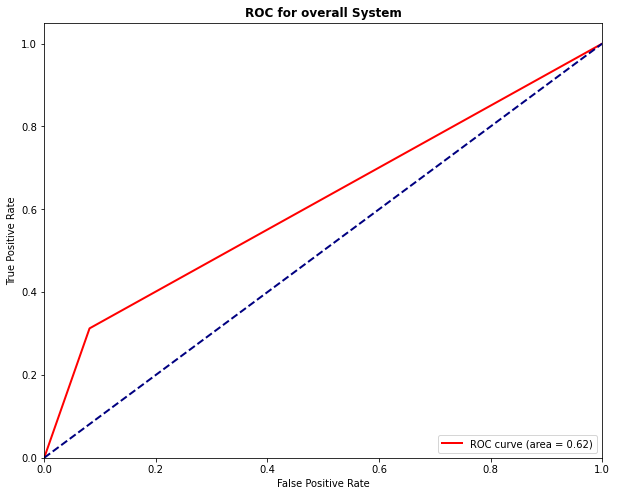

In [84]:
plot_roc(y_test, predictions)